In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
def Extract_names(tables):
    return [item[0].replace(": \n", '') for item in tables]
    
def Extract_val(tables, val):
    return [item[val] for item in tables]

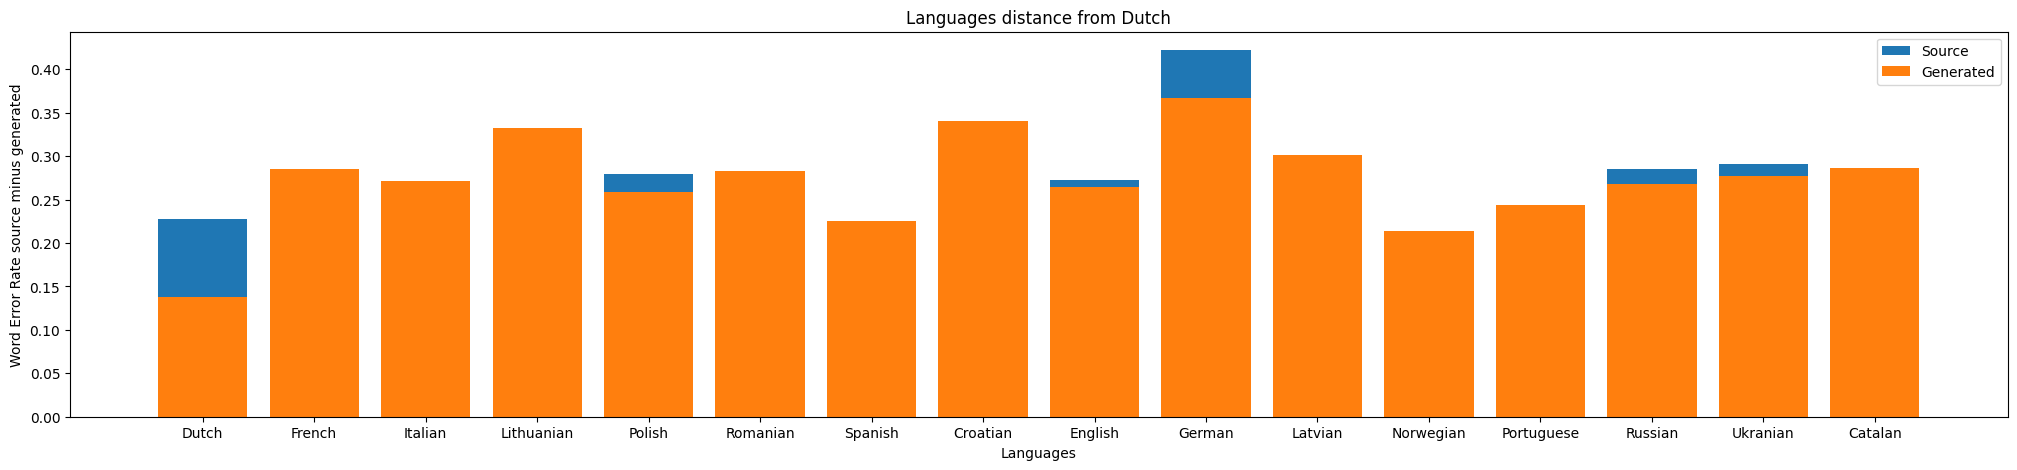

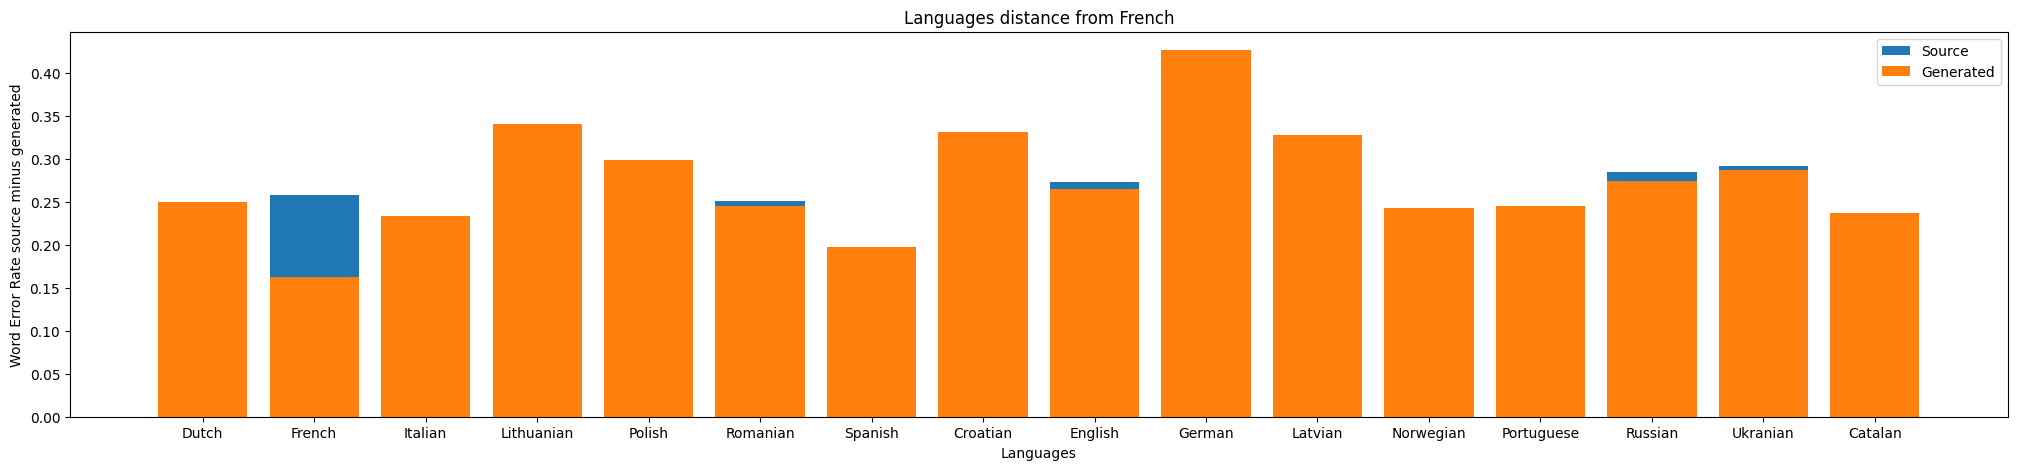

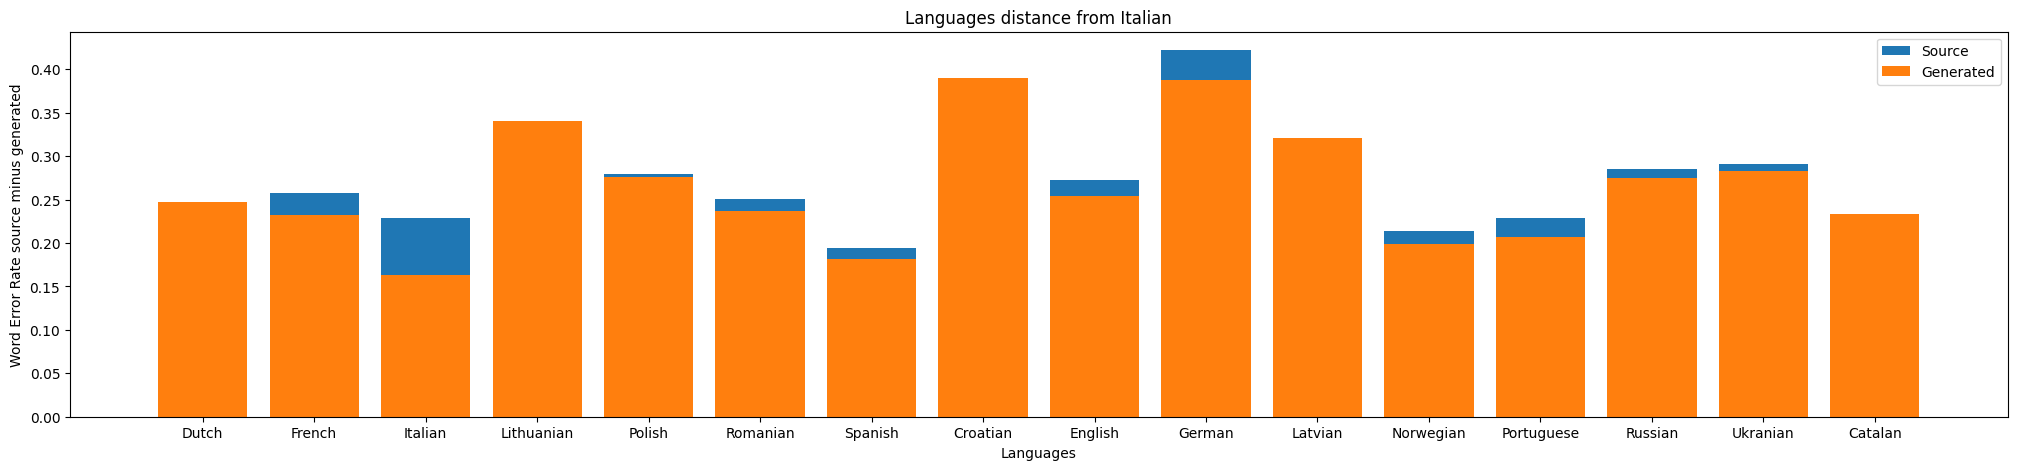

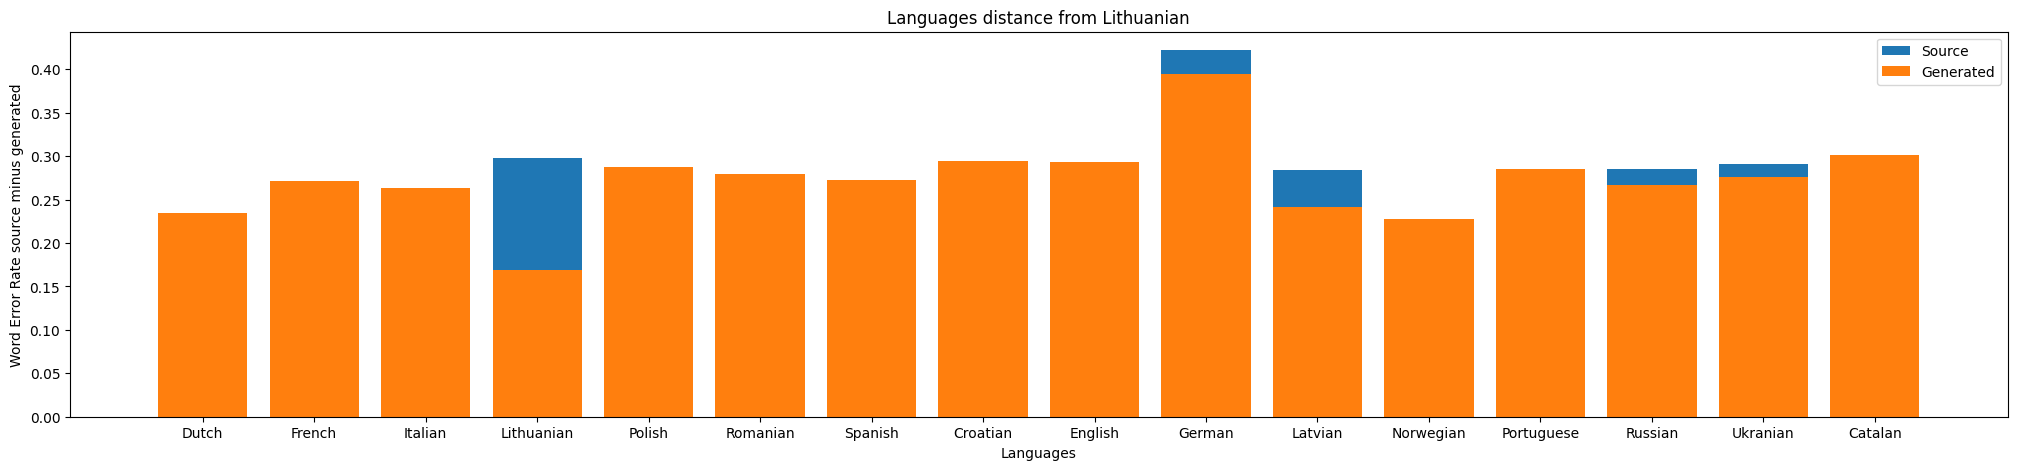

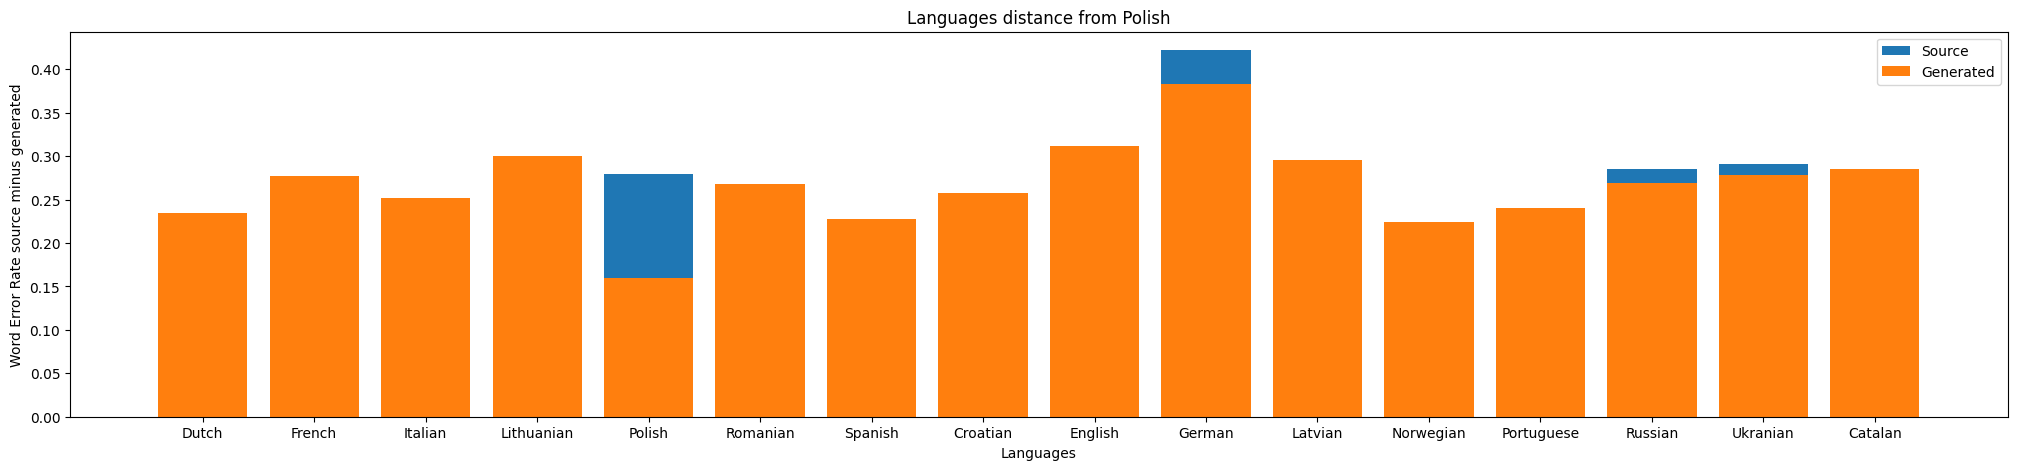

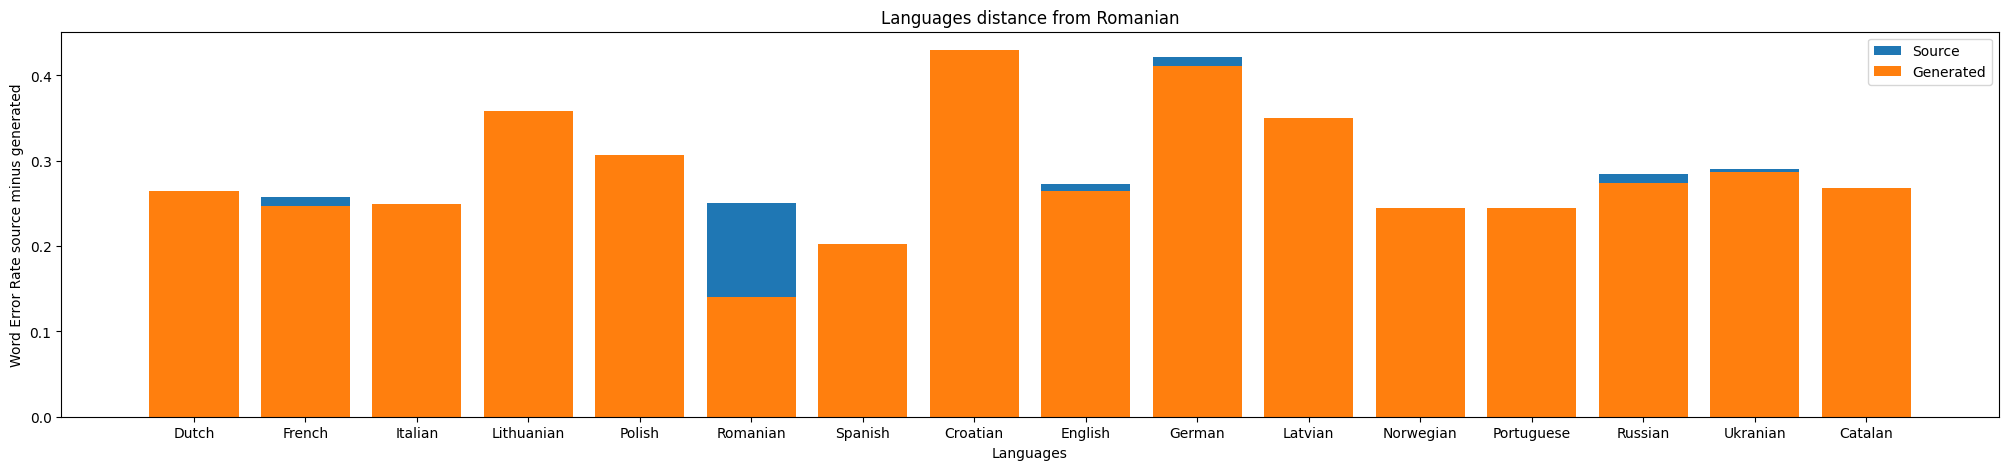

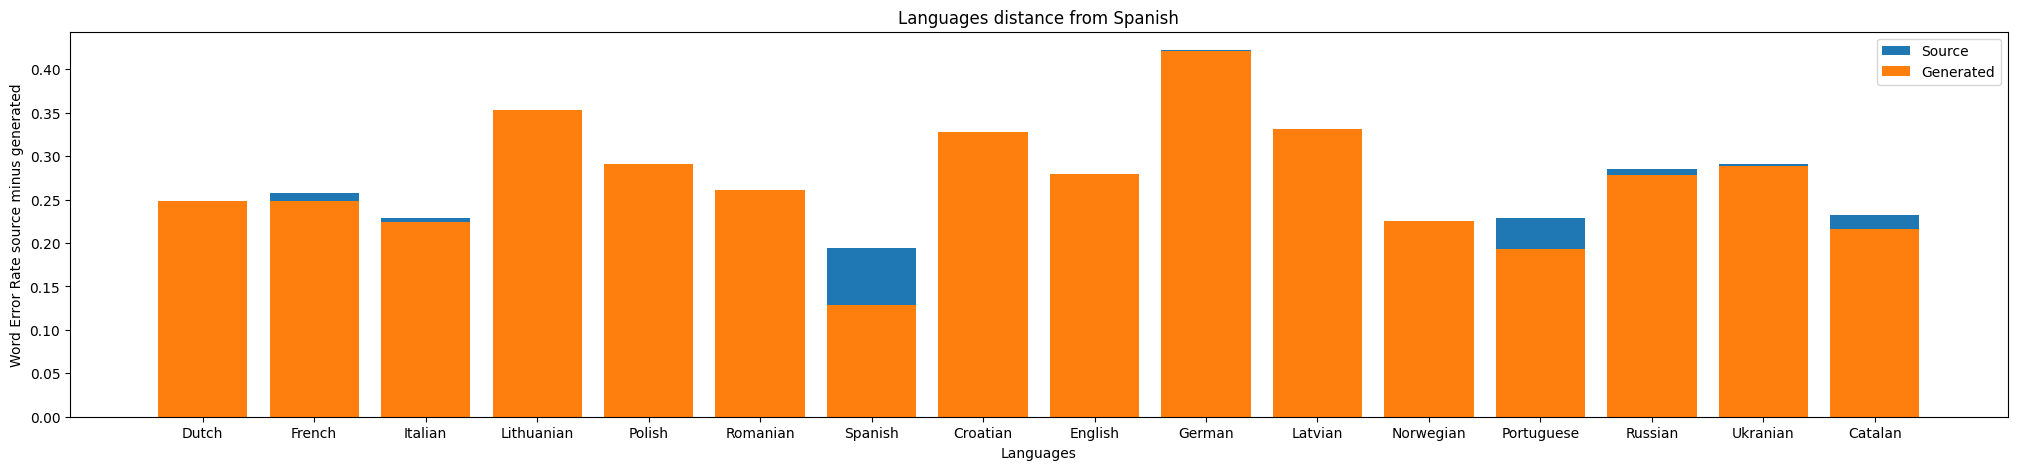

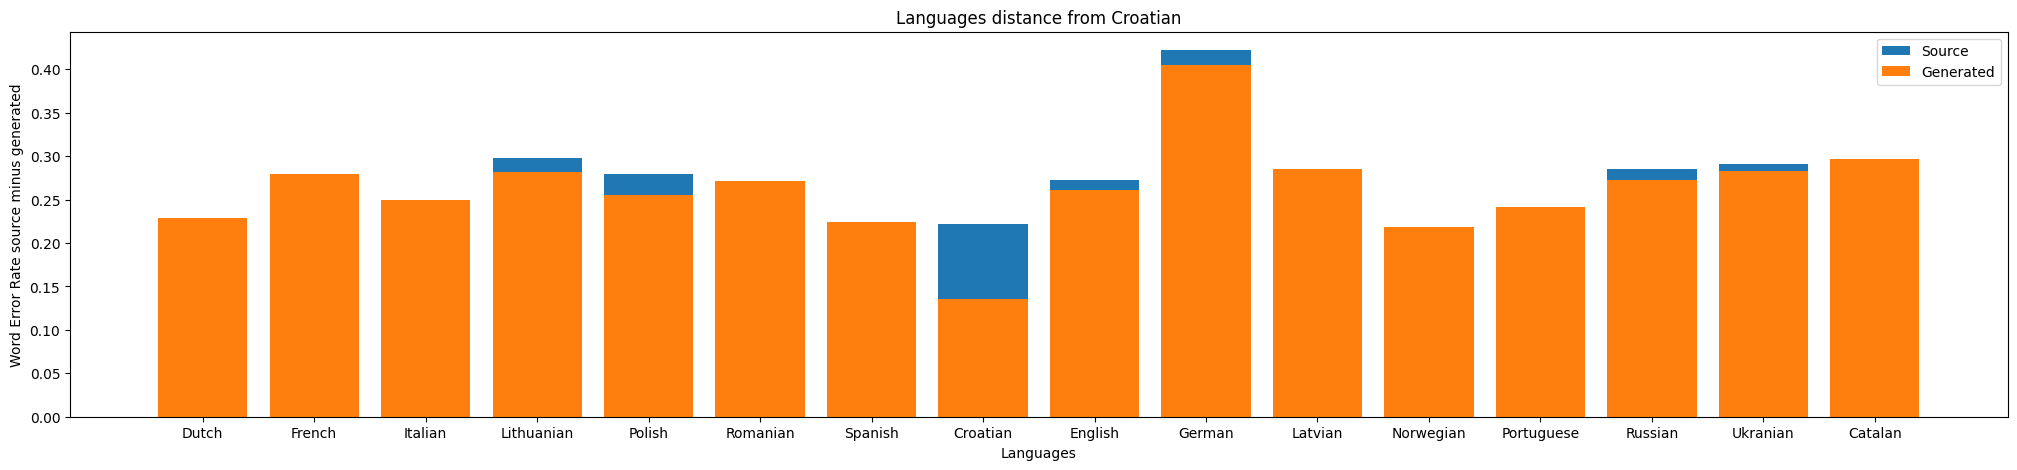

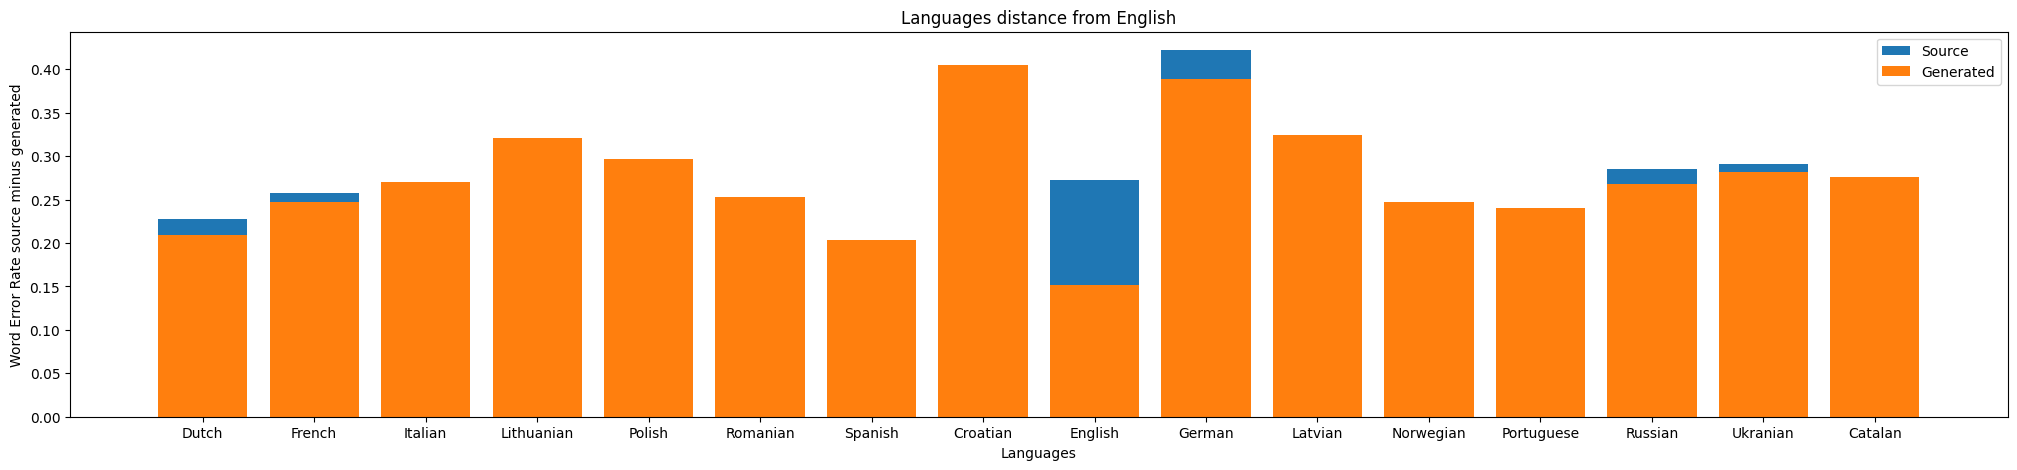

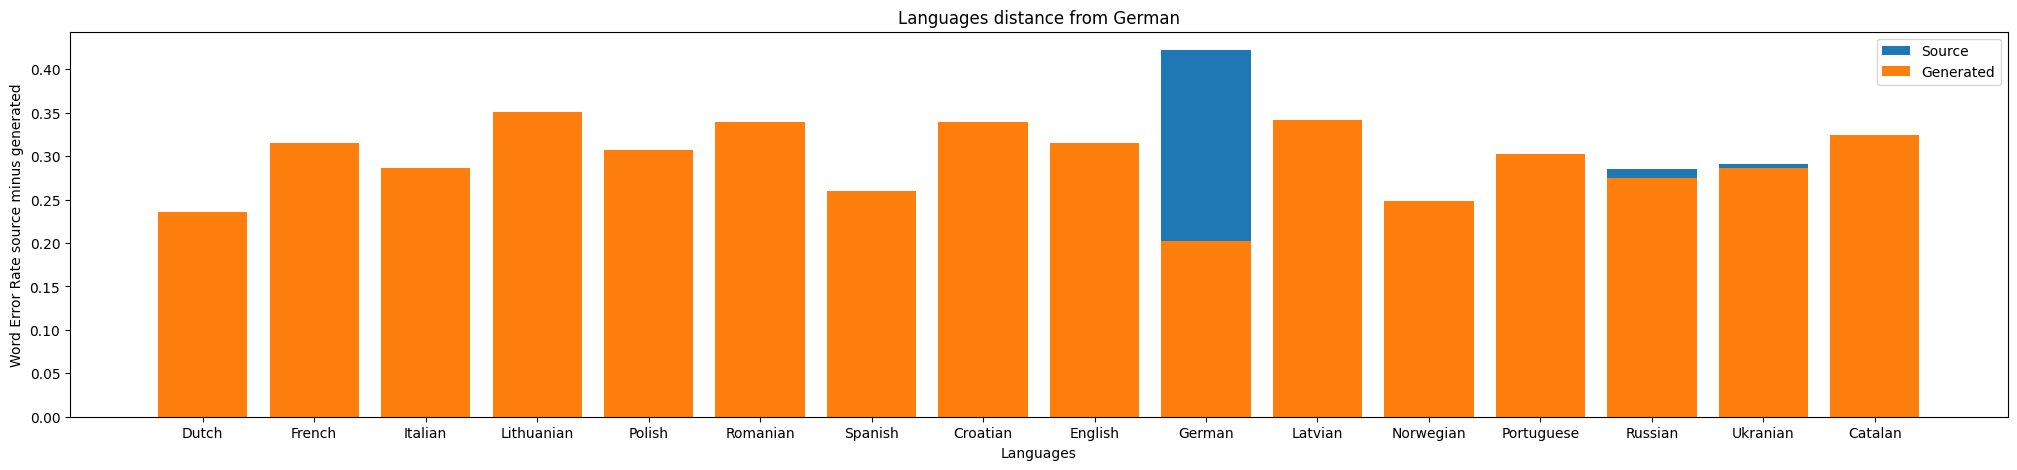

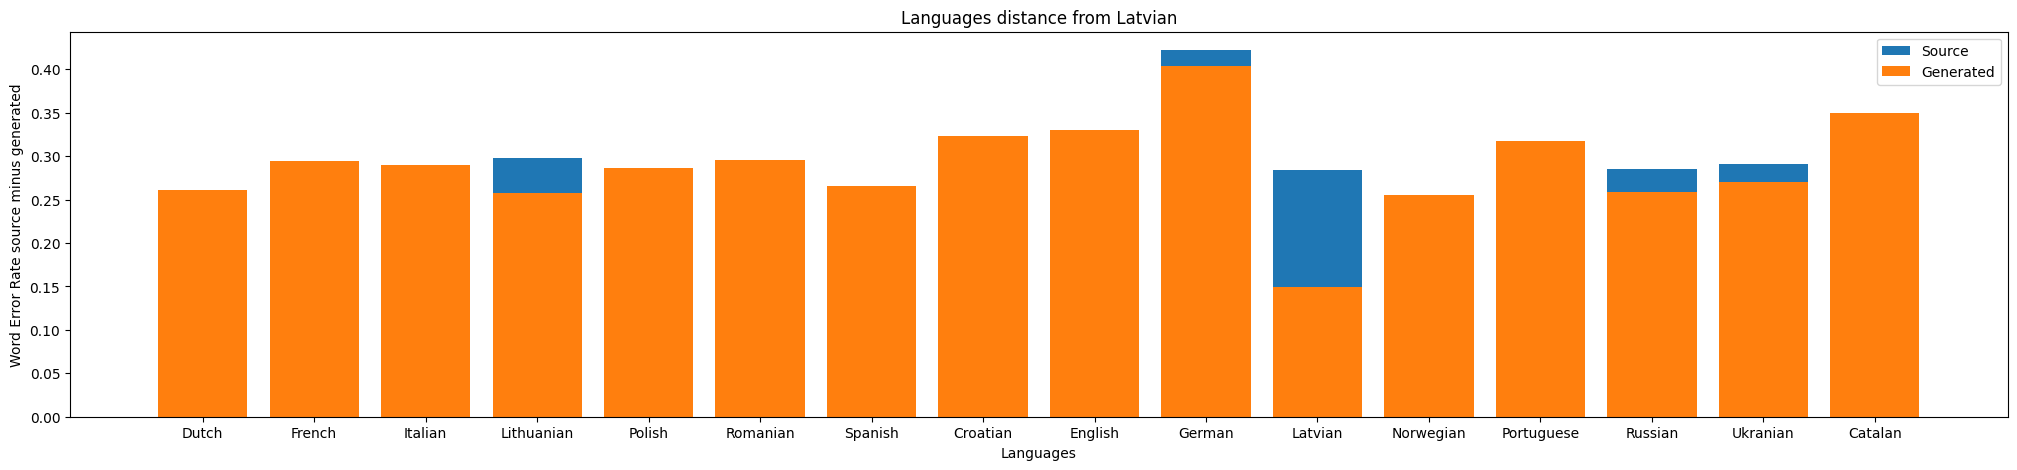

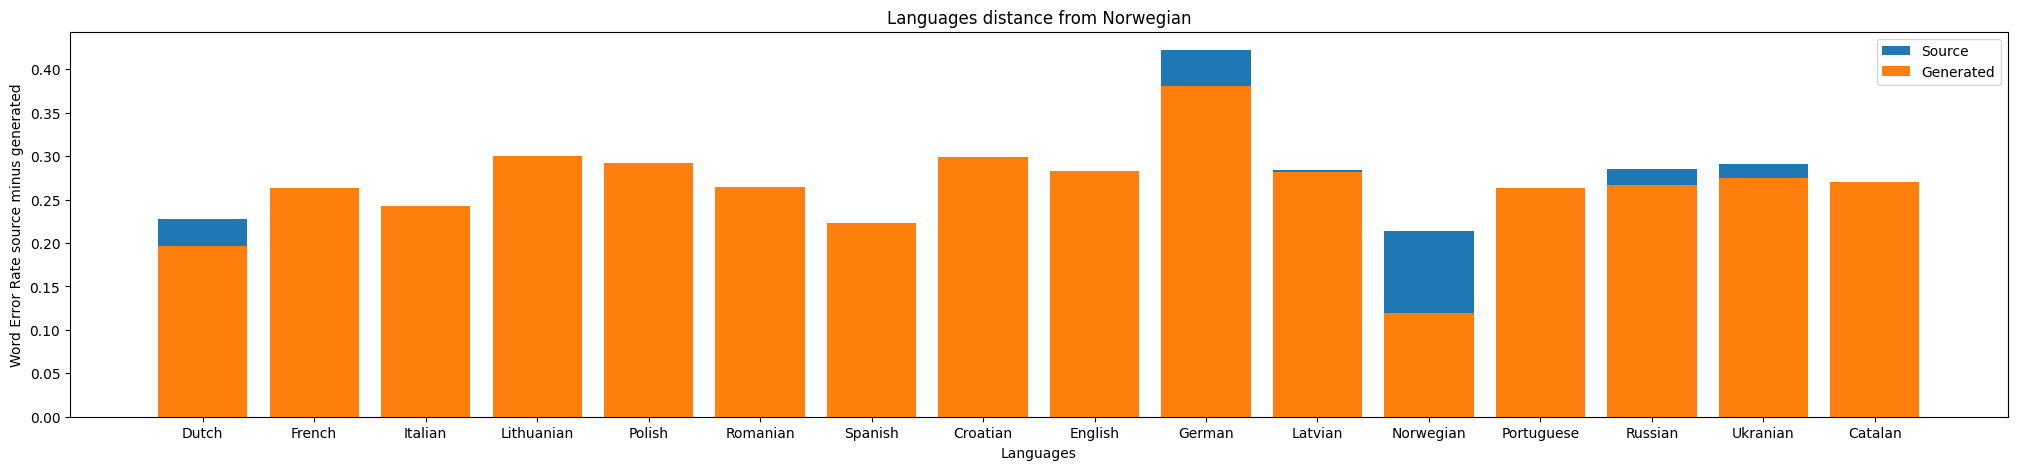

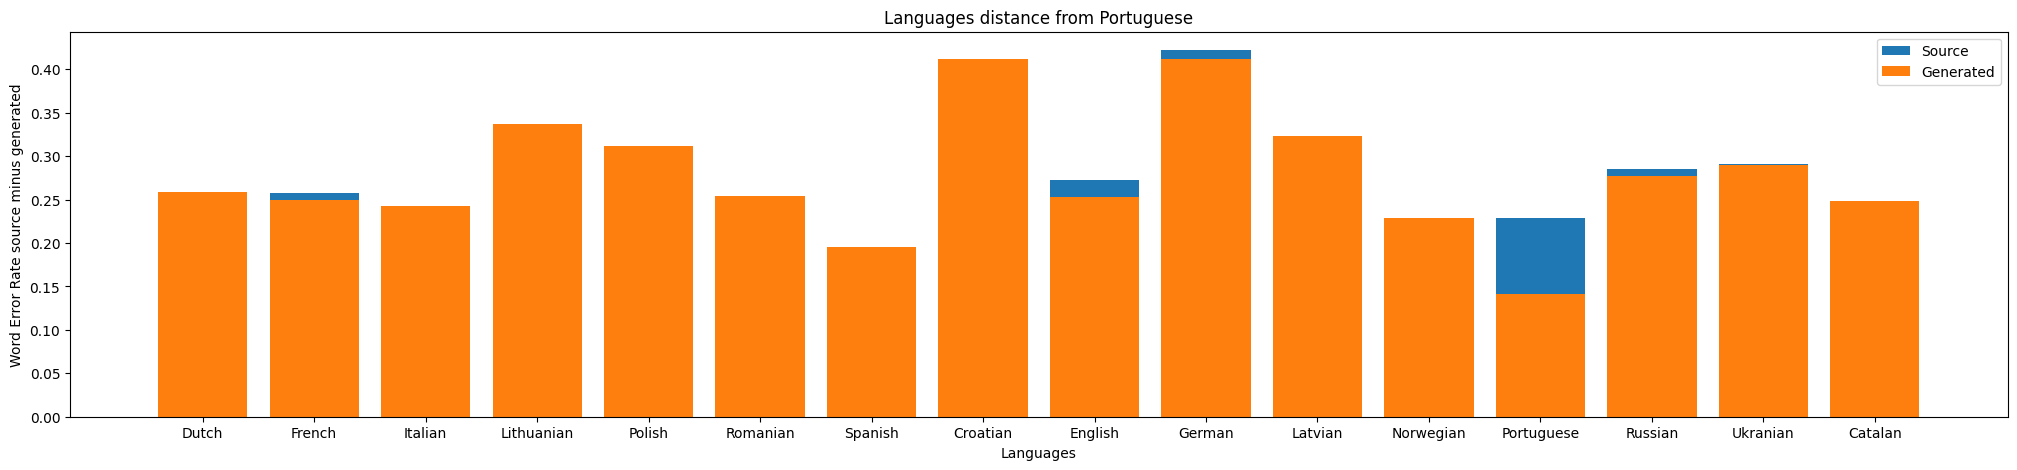

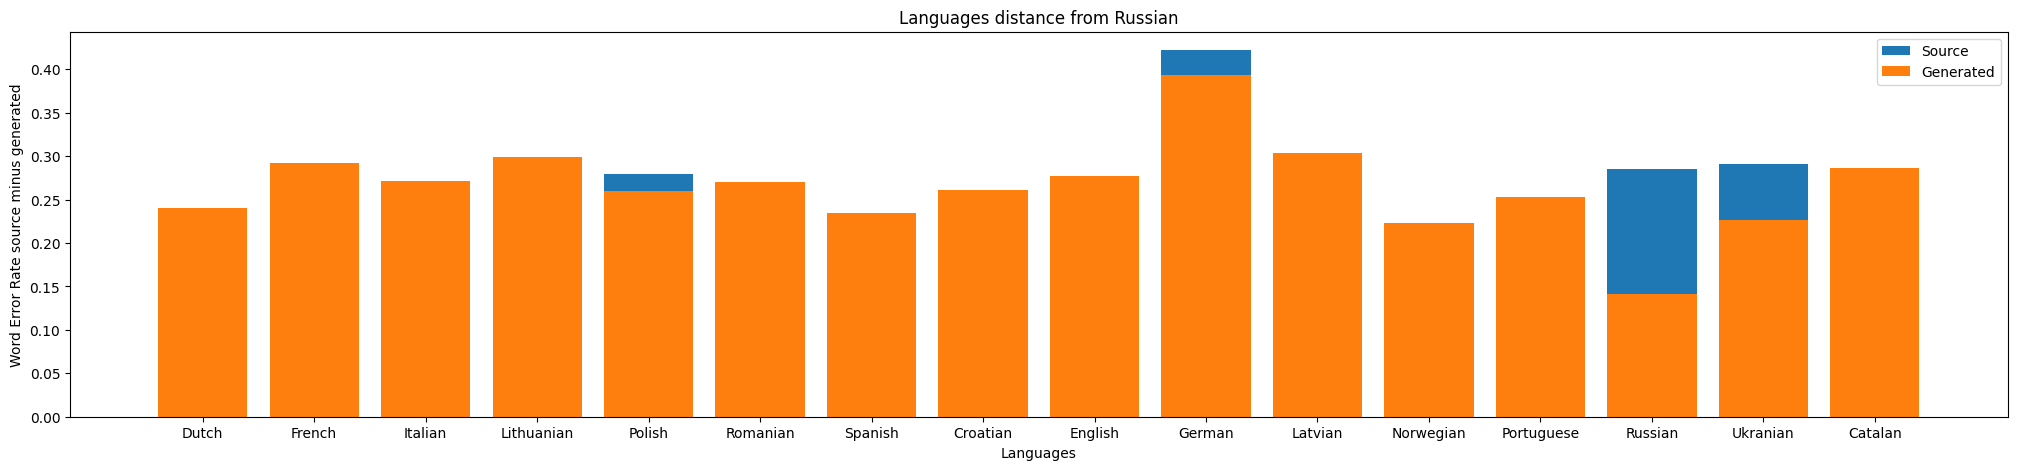

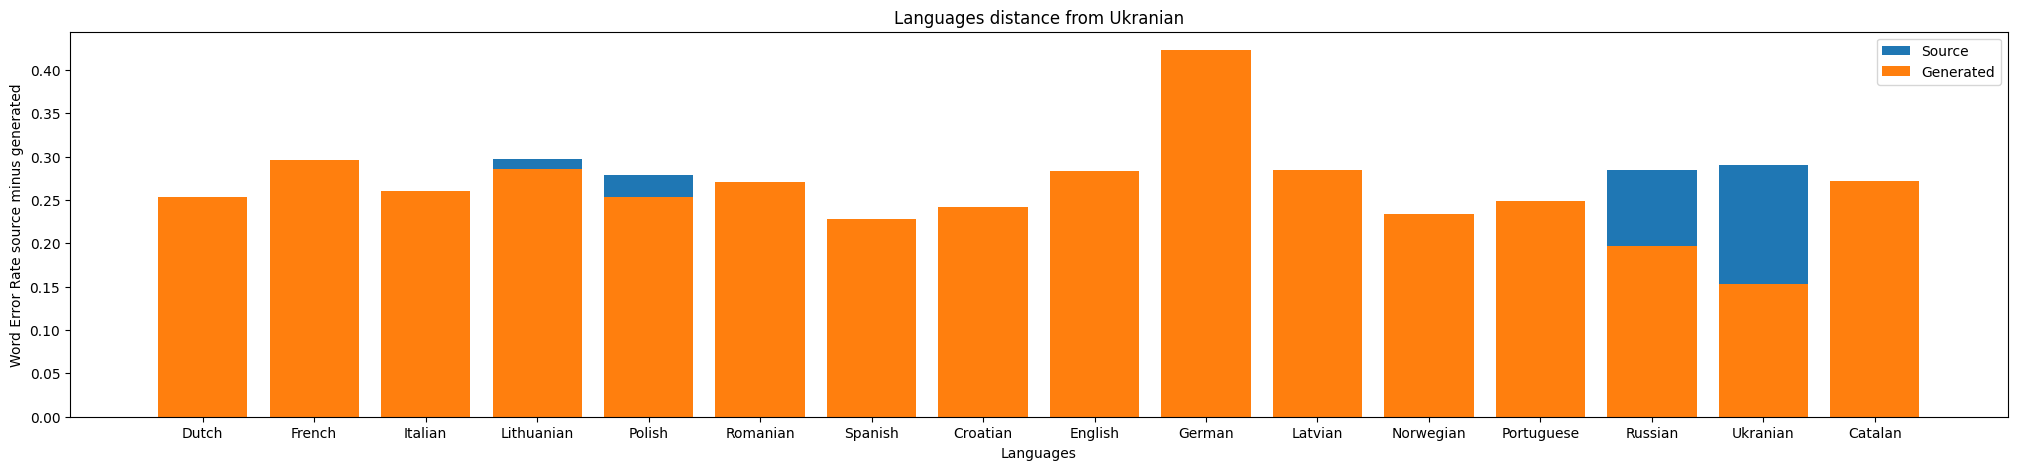

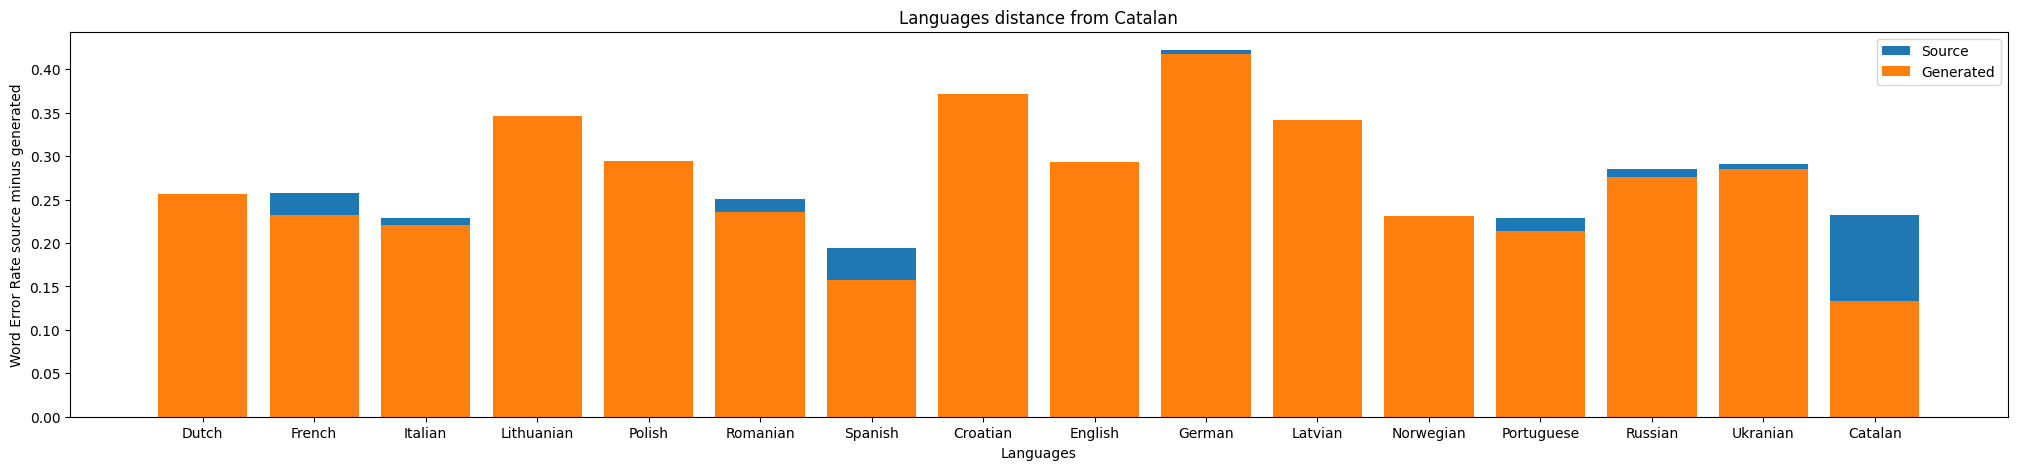

In [3]:
tables = []
tables_source = []
tables_gen = []

lans = ['Catalan', 'Spanish', 'Portuguese',
        'French', 'Italian', 'Romanian', 'Lithuanian',
        'Latvian', 'English', 'Dutch', 'German', 'Croatian',
        'Polish', 'Russian', 'Ukranian', 'Norwegian']

lans = ['Dutch', 'French', 'Italian', 'Lithuanian',
            'Polish', 'Romanian', 'Spanish', 'Croatian', 'English',
            'German', 'Latvian', 'Norwegian', 'Portuguese', 'Russian',
            'Ukranian']
for l in lans:
    table = [ [] for _ in range(16) ]
    table_source = [ [] for _ in range(16) ]
    table_gen = [ [] for _ in range(16) ]
    with open('wer_ser_{}.txt'.format(l)) as f:
        lines = f.readlines()
        for i in range(16):
            entry = lines[i*10:(i+10)*10]
            wer_gt = float(re.findall("\d+\.\d+", entry[1])[0])
            wer_gt_p = float(re.findall("\d+\.\d\d\d\d\d", entry[2])[0])
            wer_gt_c = float(re.findall("\d+\.\d\d\d\d\d", entry[3])[0])
            wer_s = float(re.findall("\d+\.\d\d\d\d\d", entry[4])[0])
            wer_s_p = float(re.findall("\d+\.\d\d\d\d\d", entry[5])[0])
            wer_s_c = float(re.findall("\d+\.\d\d\d\d\d", entry[6])[0])
            table[i] = [entry[0], wer_s - wer_gt, wer_s_p - wer_gt_p, wer_s_c - wer_gt_c]
            table_source[i] = [entry[0], wer_s, wer_s_p, wer_s_c]
            table_gen[i] = [entry[0], wer_gt, wer_gt_p, wer_gt_c]
        #table = sorted(table, key=itemgetter(0))
        tables.append(table)
        tables_source.append(table_source)
        tables_gen.append(table_gen)
        #print(table)
        
        cat = 1
        
        langs = Extract_names(table)
        pred =  Extract_val(table, cat)
        pred_source =  Extract_val(table_source, cat)
        pred_gen =  Extract_val(table_gen, cat)

        fig = plt.figure(figsize = (25, 5))

        # creating the bar plot
        bar1 = plt.bar(langs, pred_source)
        bar2 = plt.bar(langs, pred_gen)

        plt.xlabel("Languages")
        plt.ylabel("Word Error Rate source minus generated")
        plt.title("Languages distance from {}".format(l))
        plt.legend((bar1, bar2), ('Source', 'Generated'))
        plt.show()



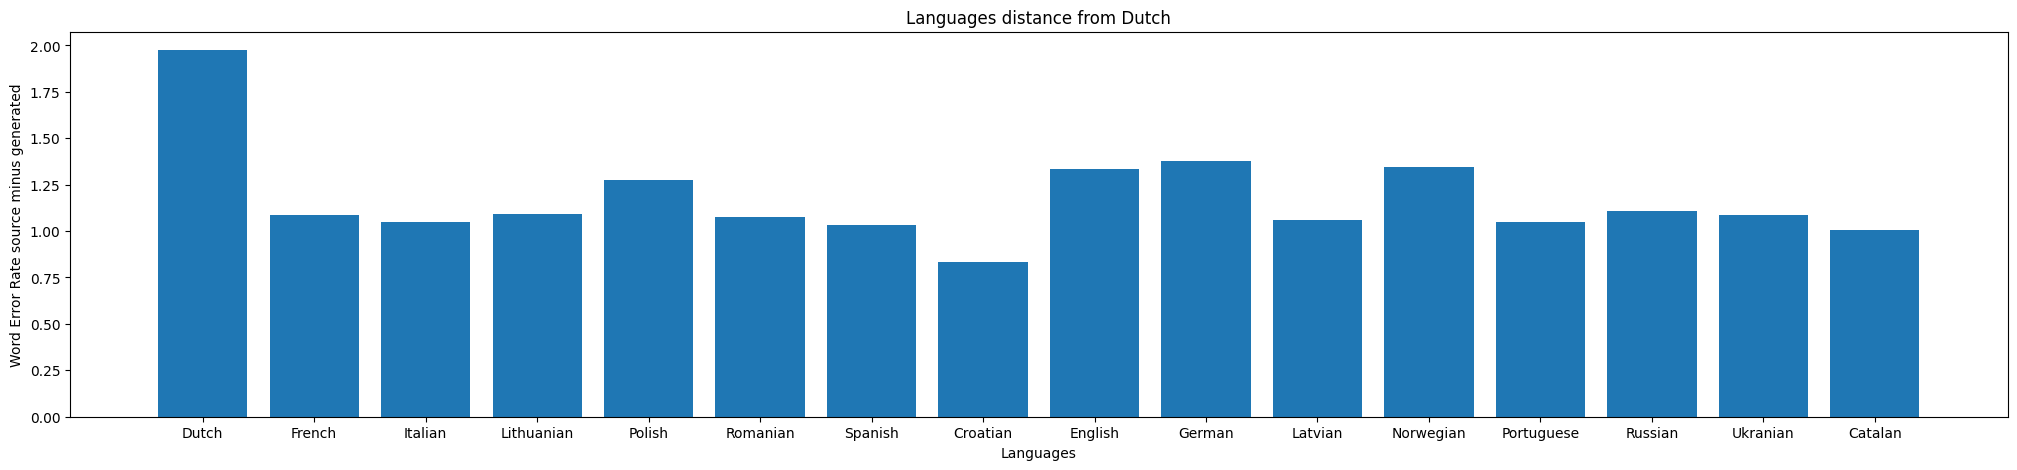

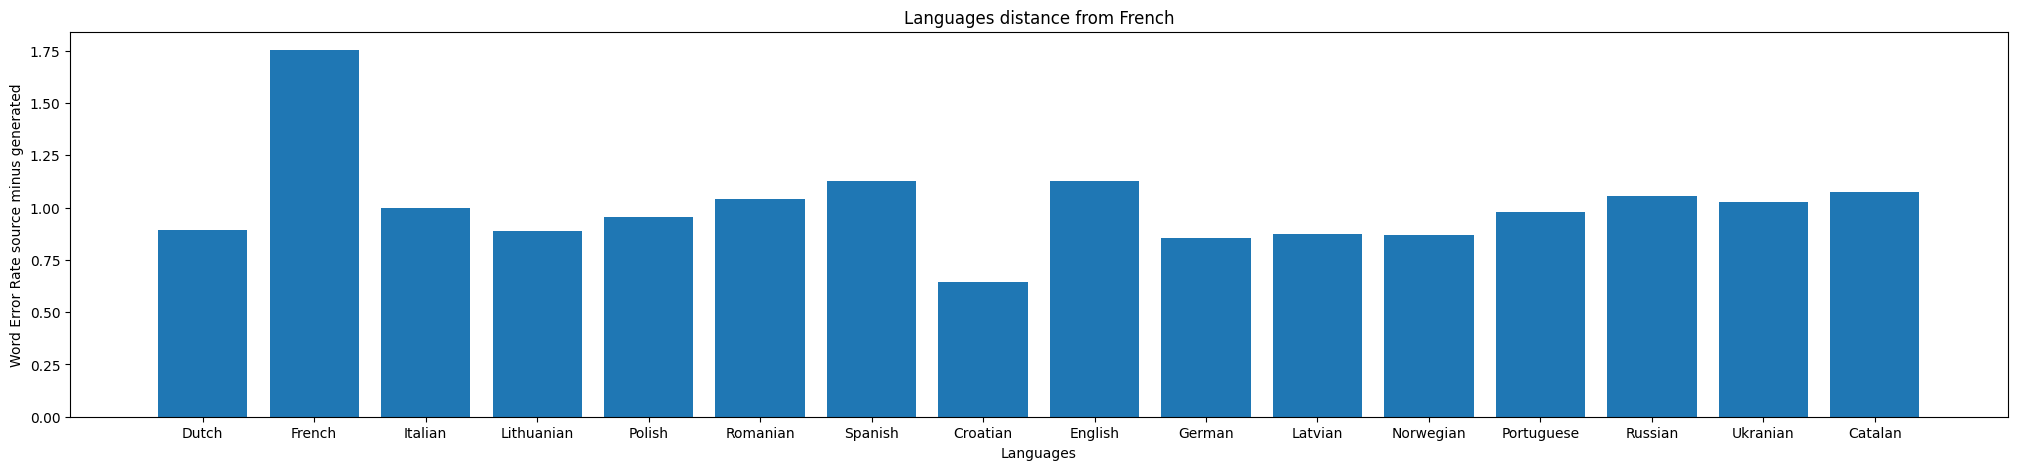

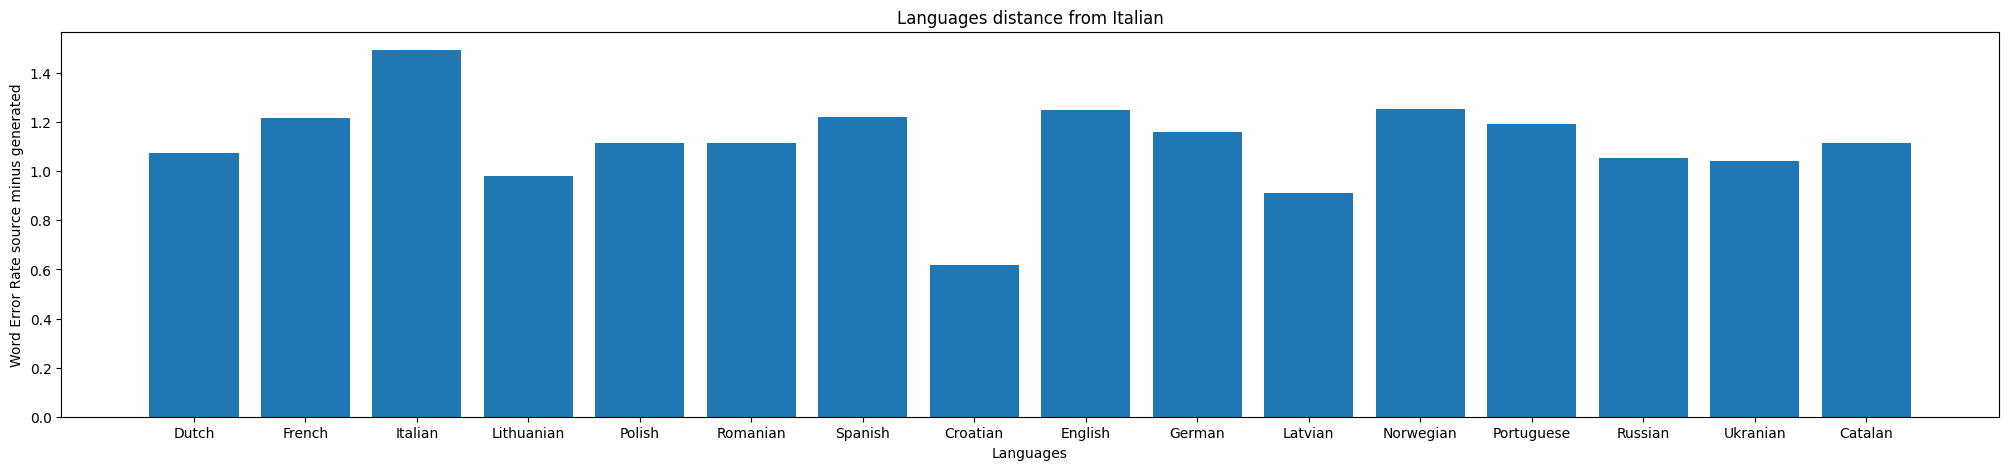

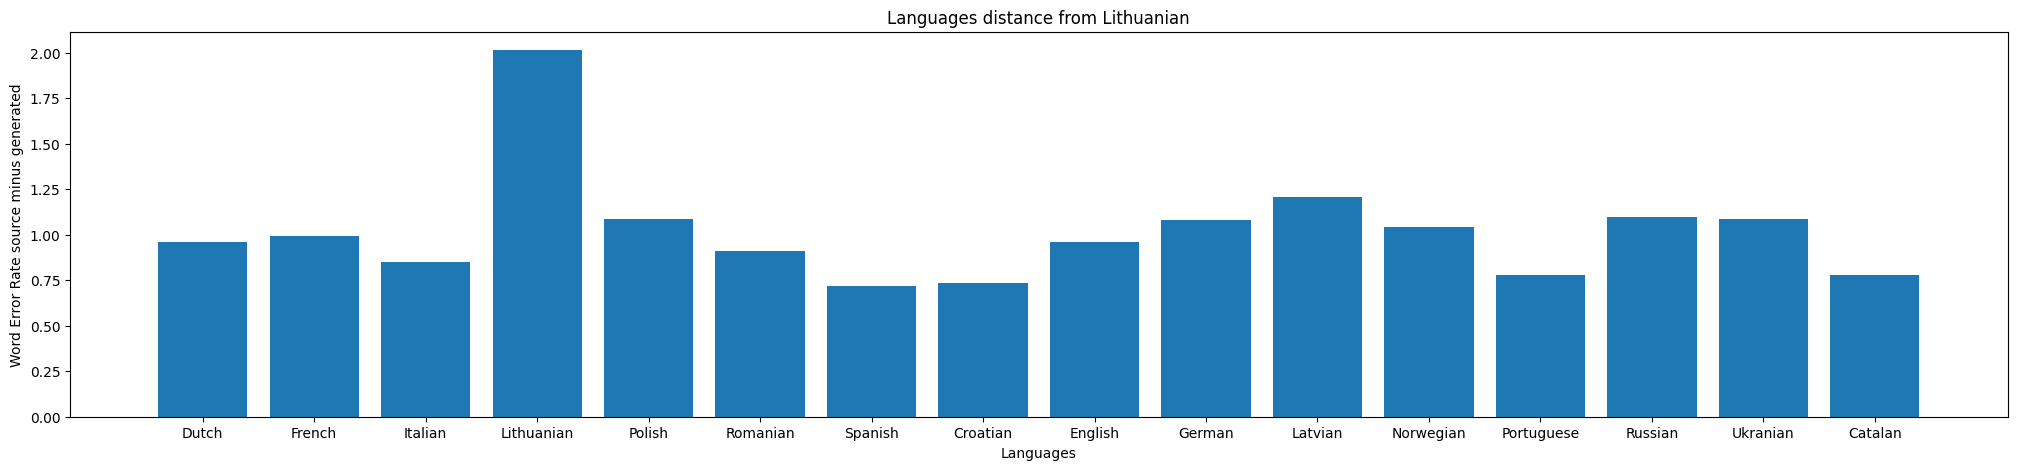

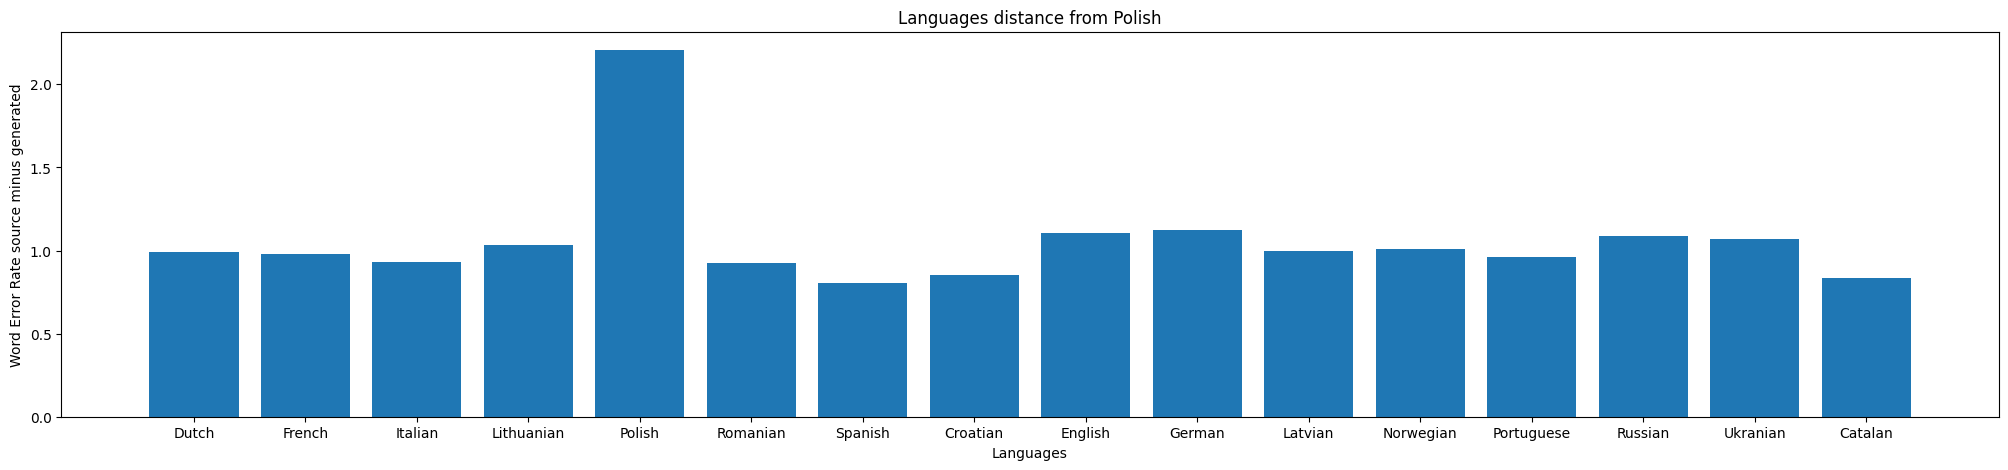

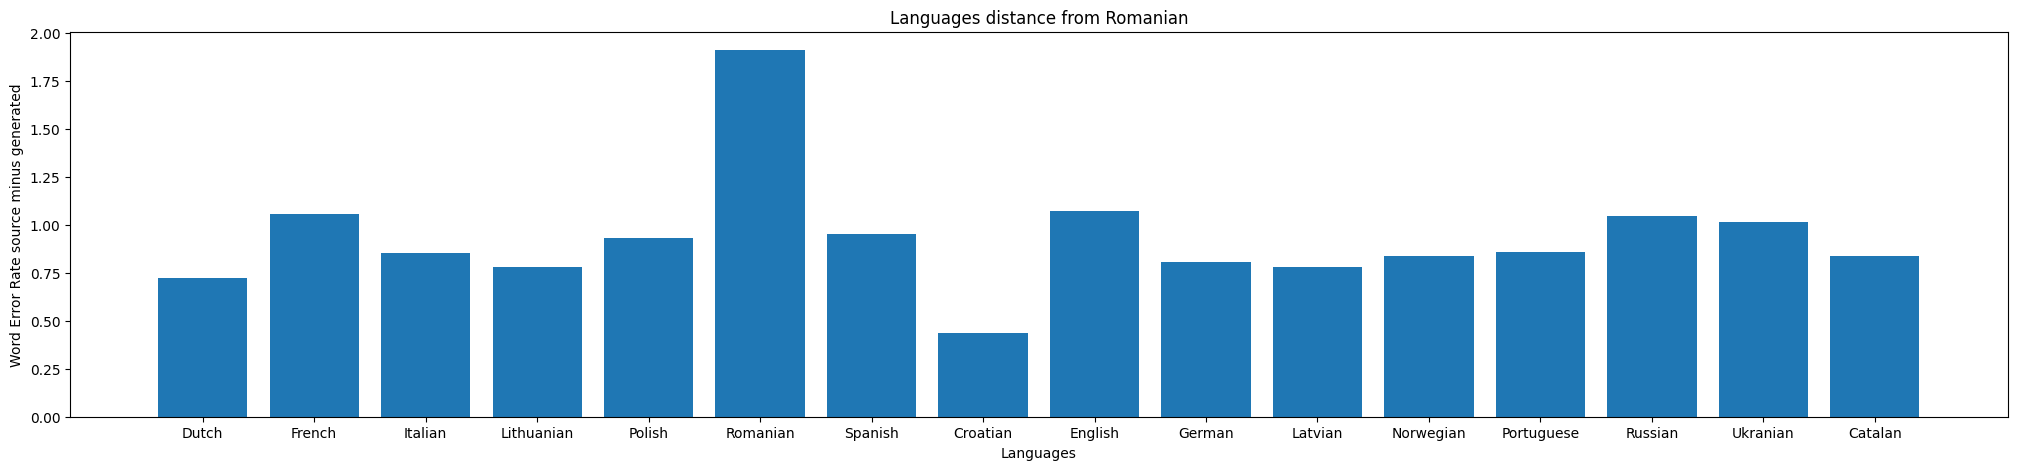

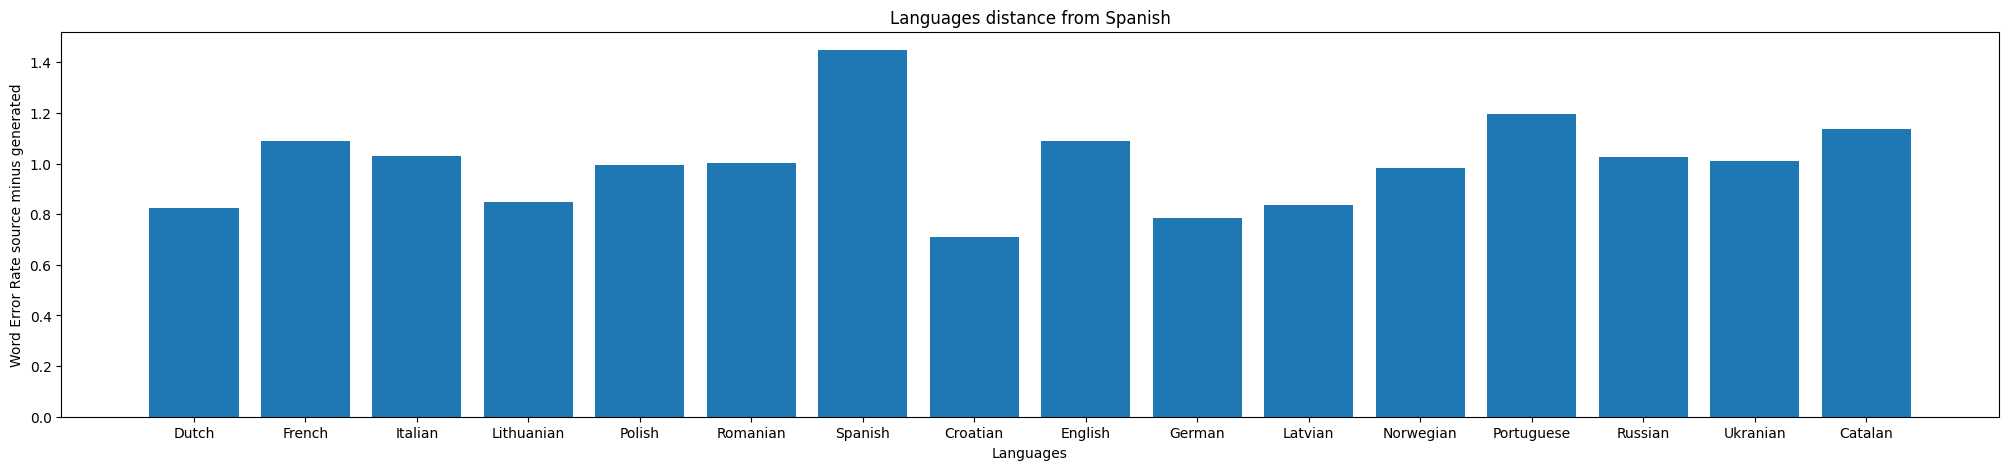

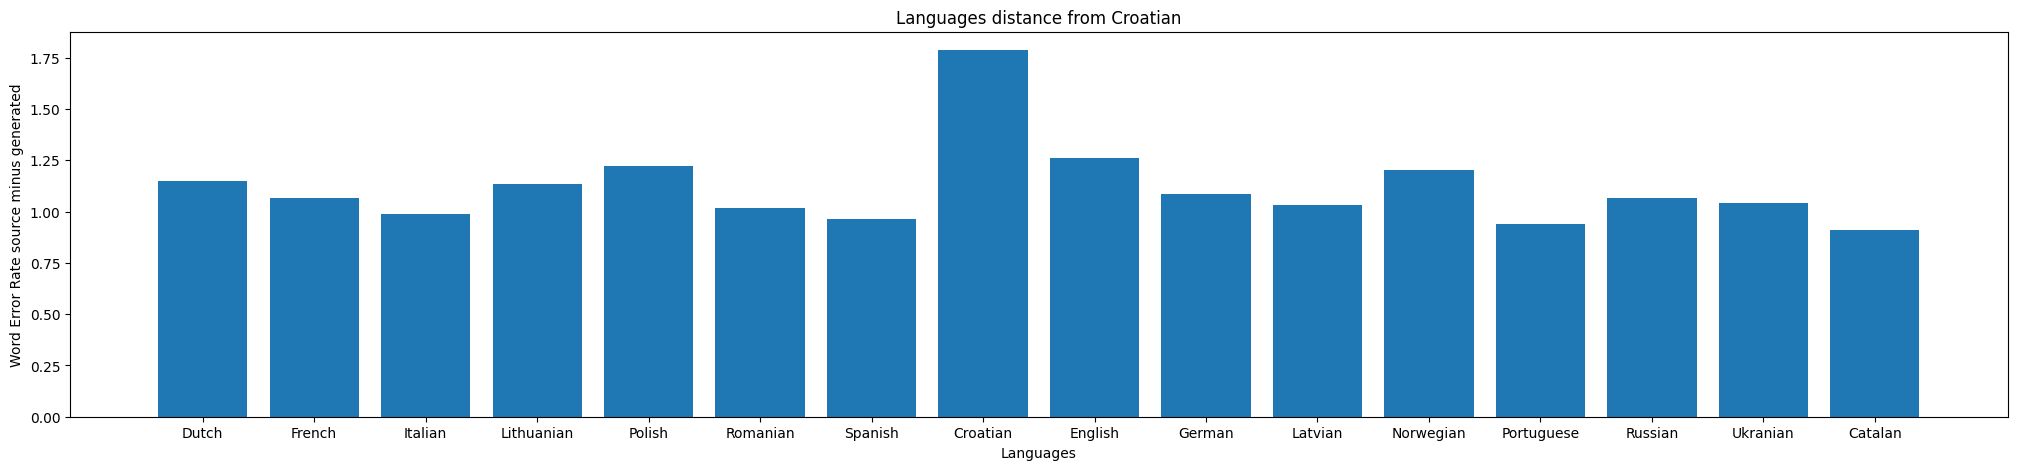

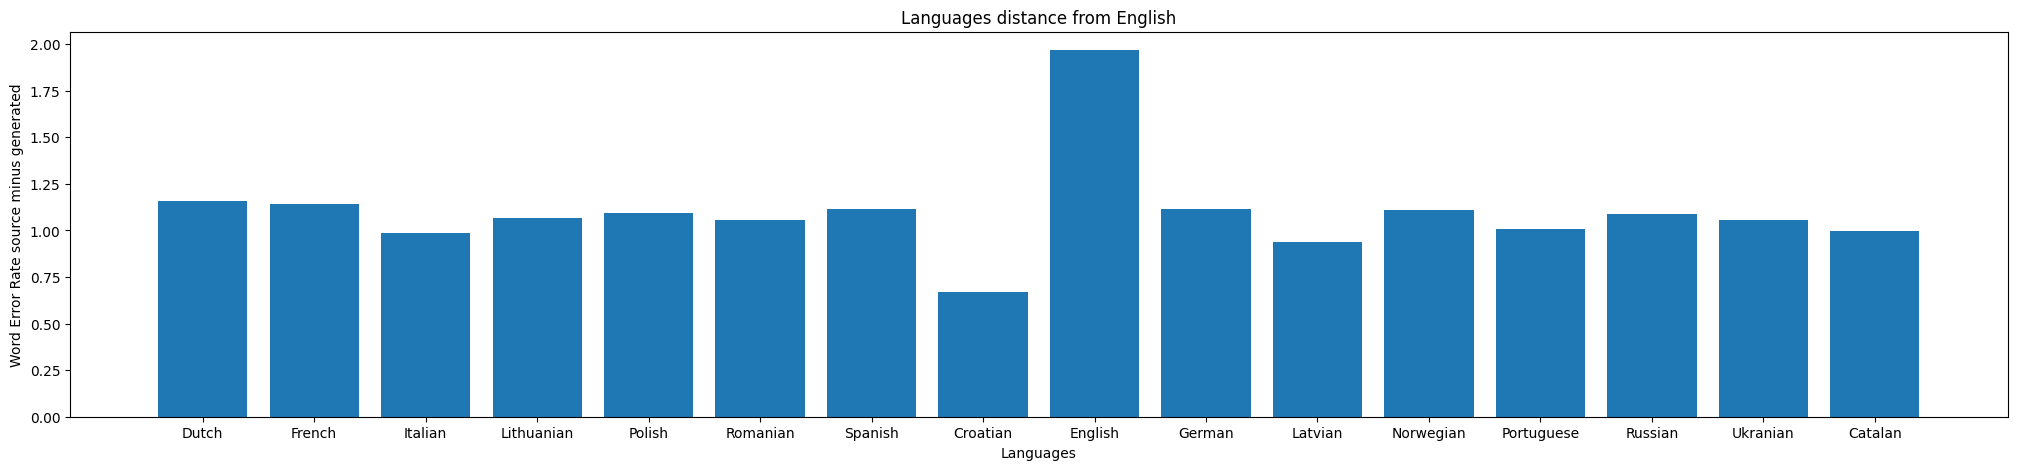

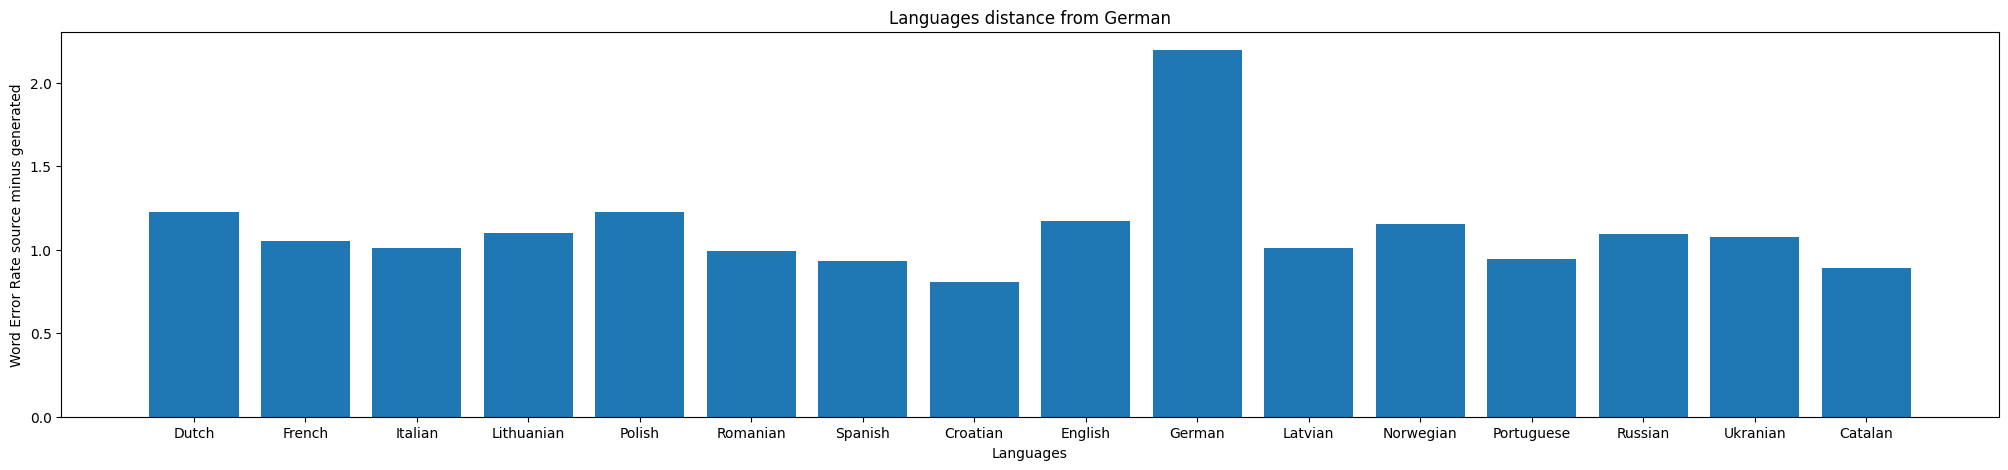

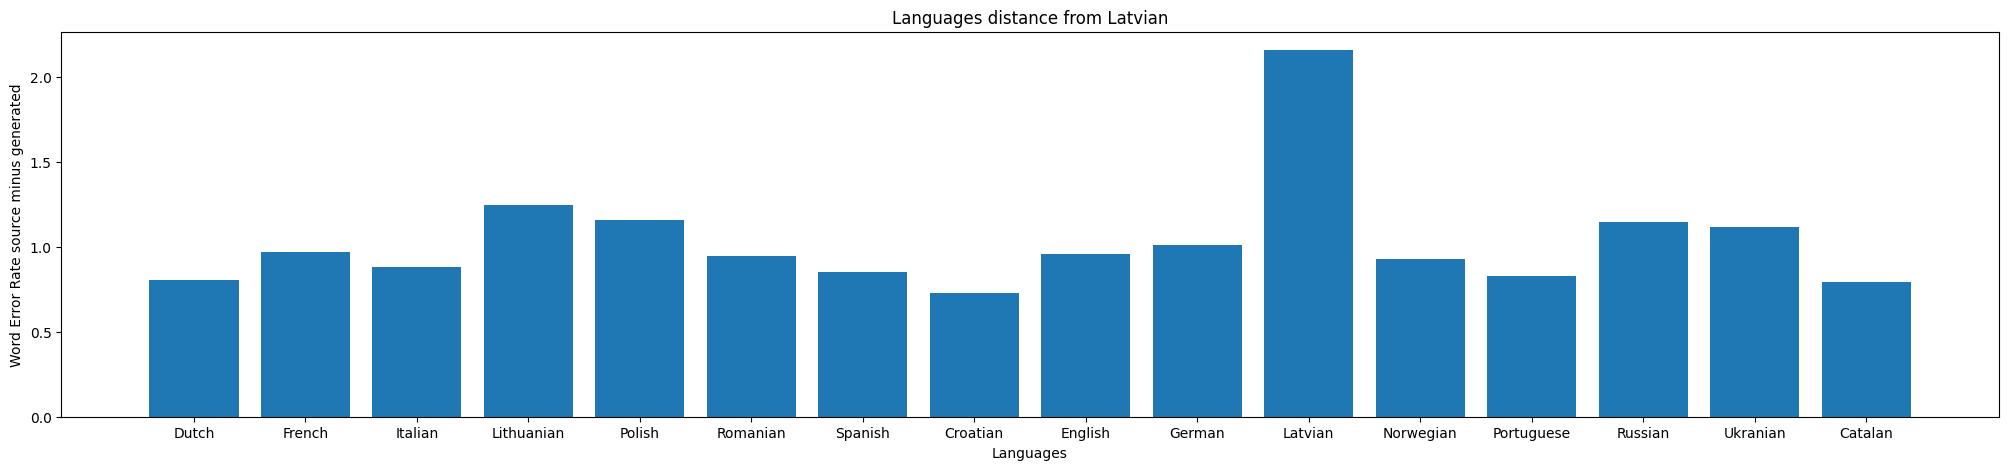

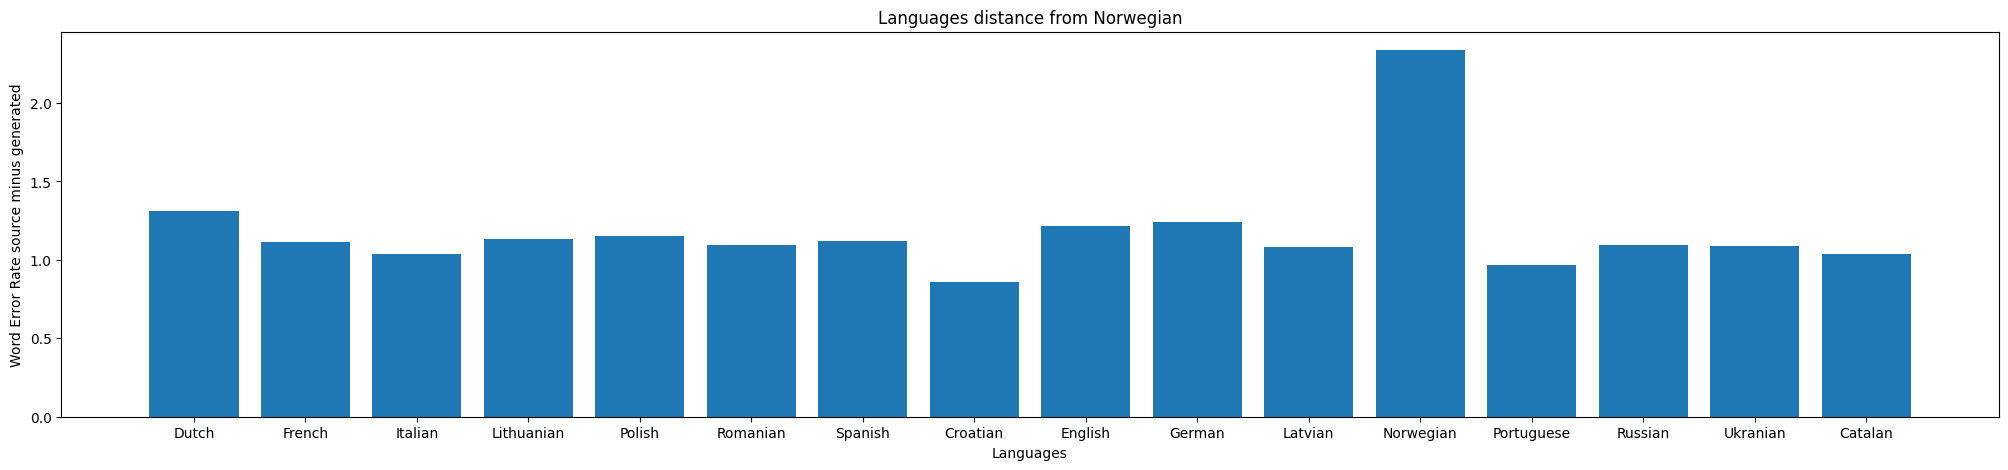

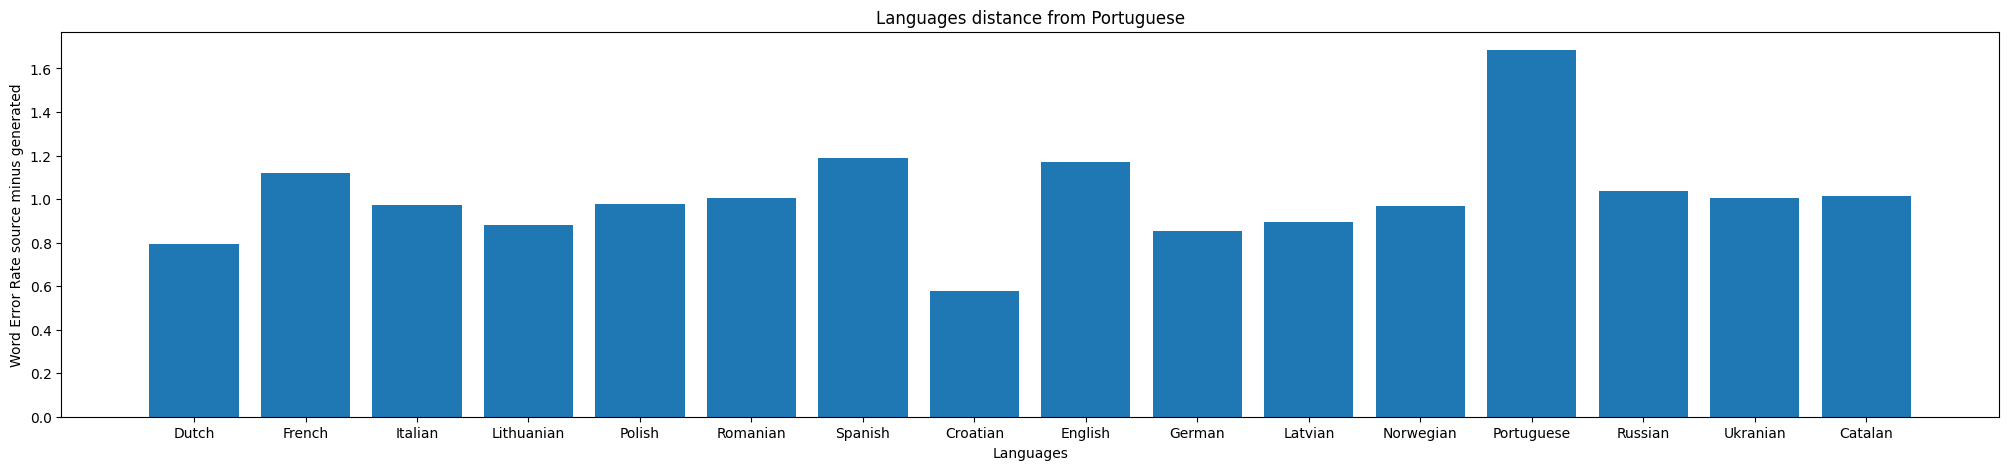

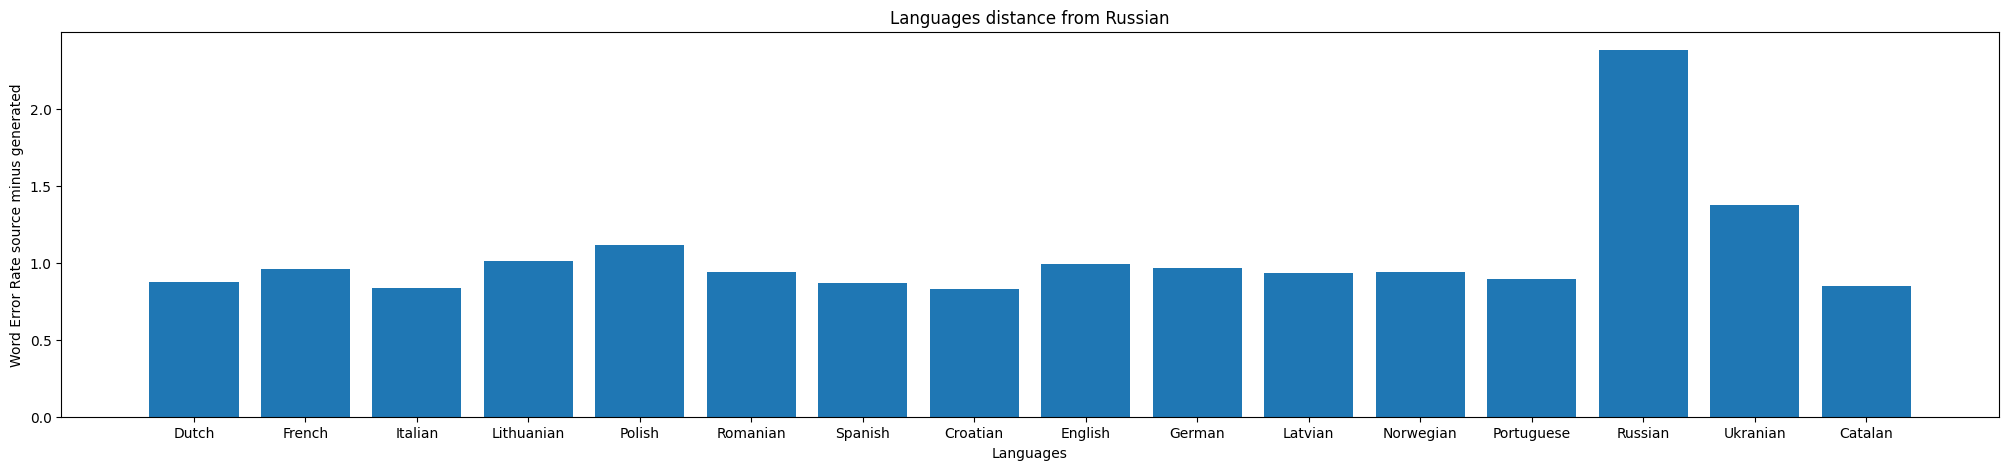

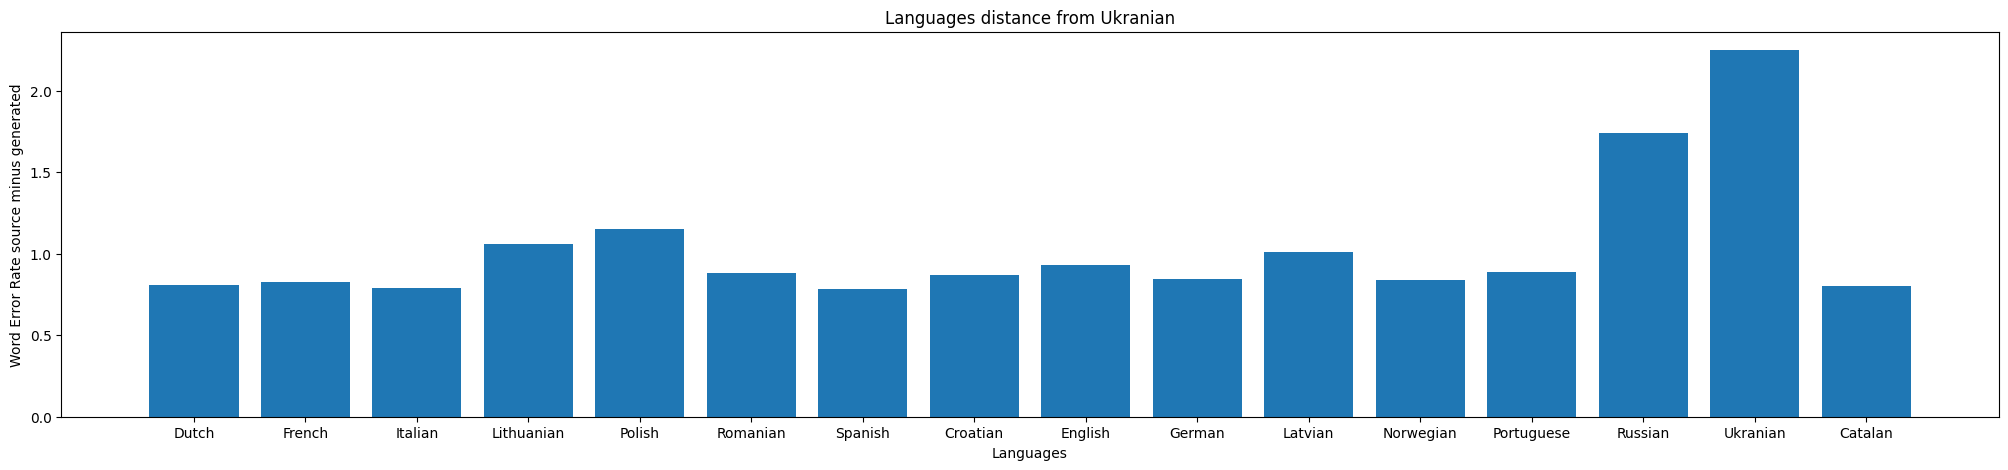

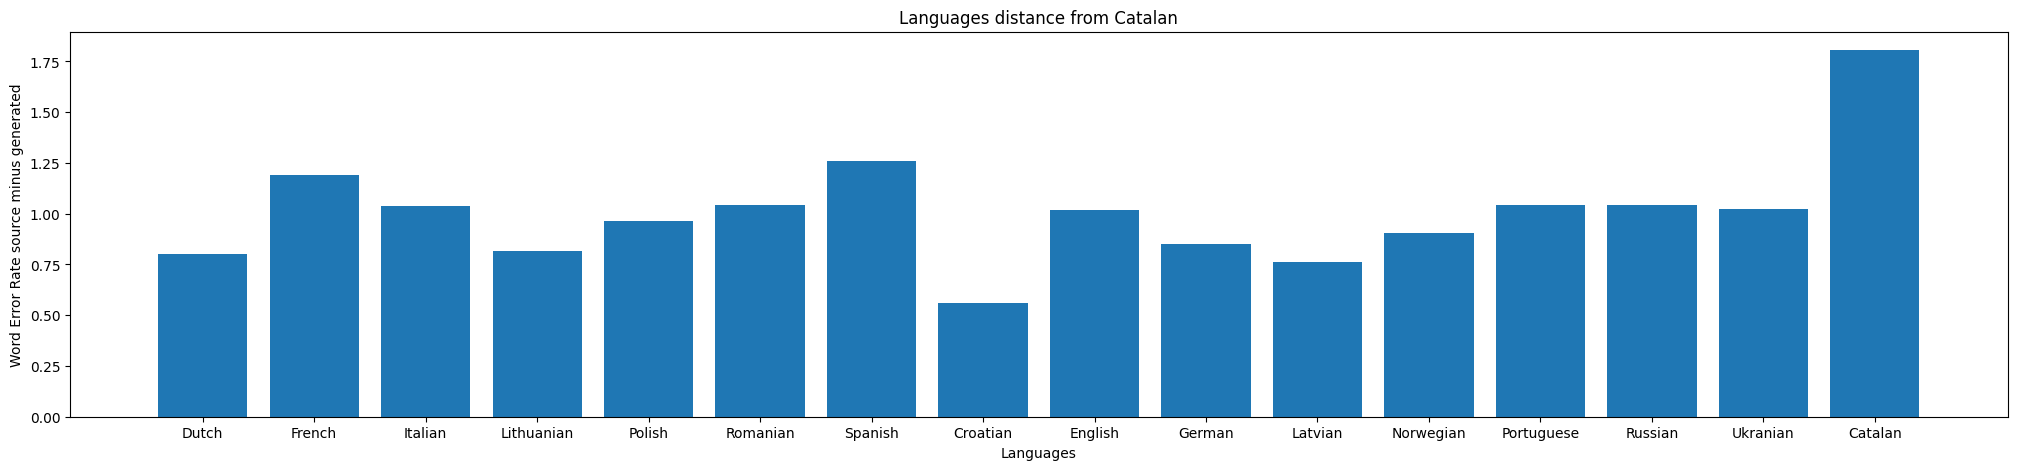

In [4]:
tables = []

#lans = ['Catalan', 'Spanish', 'Portuguese',
#        'French', 'Italian', 'Romanian', 'Lithuanian',
#        'Latvian', 'English', 'Dutch', 'German', 'Croatian',
#        'Polish', 'Russian', 'Ukranian', 'Norwegian']

lans = ['Dutch', 'French', 'Italian', 'Lithuanian',
            'Polish', 'Romanian', 'Spanish', 'Croatian', 'English',
            'German', 'Latvian', 'Norwegian', 'Portuguese', 'Russian',
            'Ukranian', 'Catalan']
for l in lans:
    table = [ [] for _ in range(16) ]
    with open('wer_ser_{}.txt'.format(l)) as f:
        lines = f.readlines()
        for i in range(16):
            entry = lines[i*10:(i+10)*10]
            wer_gt = float(re.findall("\d+\.\d+", entry[1])[0])
            wer_gt_p = float(re.findall("\d+\.\d\d\d\d\d", entry[2])[0])
            wer_gt_c = float(re.findall("\d+\.\d\d\d\d\d", entry[3])[0])
            wer_s = float(re.findall("\d+\.\d\d\d\d\d", entry[4])[0])
            wer_s_p = float(re.findall("\d+\.\d\d\d\d\d", entry[5])[0])
            wer_s_c = float(re.findall("\d+\.\d\d\d\d\d", entry[6])[0])
            table[i] = [entry[0], wer_s/wer_gt, wer_s_p/wer_gt_p, wer_s_c/wer_gt_c]
        #table = sorted(table, key=itemgetter(0))
        tables.append(table)
        #print(table)

        langs = Extract_names(table)
        pred =  Extract_val(table, 2)

        fig = plt.figure(figsize = (25, 5))

        # creating the bar plot
        plt.bar(langs, pred)

        plt.xlabel("Languages")
        plt.ylabel("Word Error Rate source minus generated")
        plt.title("Languages distance from {}".format(l))
        plt.show()



In [5]:
heatmap_val_both = [Extract_val(x,1) for x in tables]
heatmap_val_pun = [Extract_val(x,2) for x in tables]
heatmap_val_cap = [Extract_val(x,3) for x in tables]

In [6]:
conf_matrix_df_both = pd.DataFrame(heatmap_val_both,columns=lans,index=lans)
conf_matrix_df_pun = pd.DataFrame(heatmap_val_pun,columns=lans,index=lans)
conf_matrix_df_cap = pd.DataFrame(heatmap_val_cap,columns=lans,index=lans)

Text(211.15625, 0.5, 'Tuned Languages')

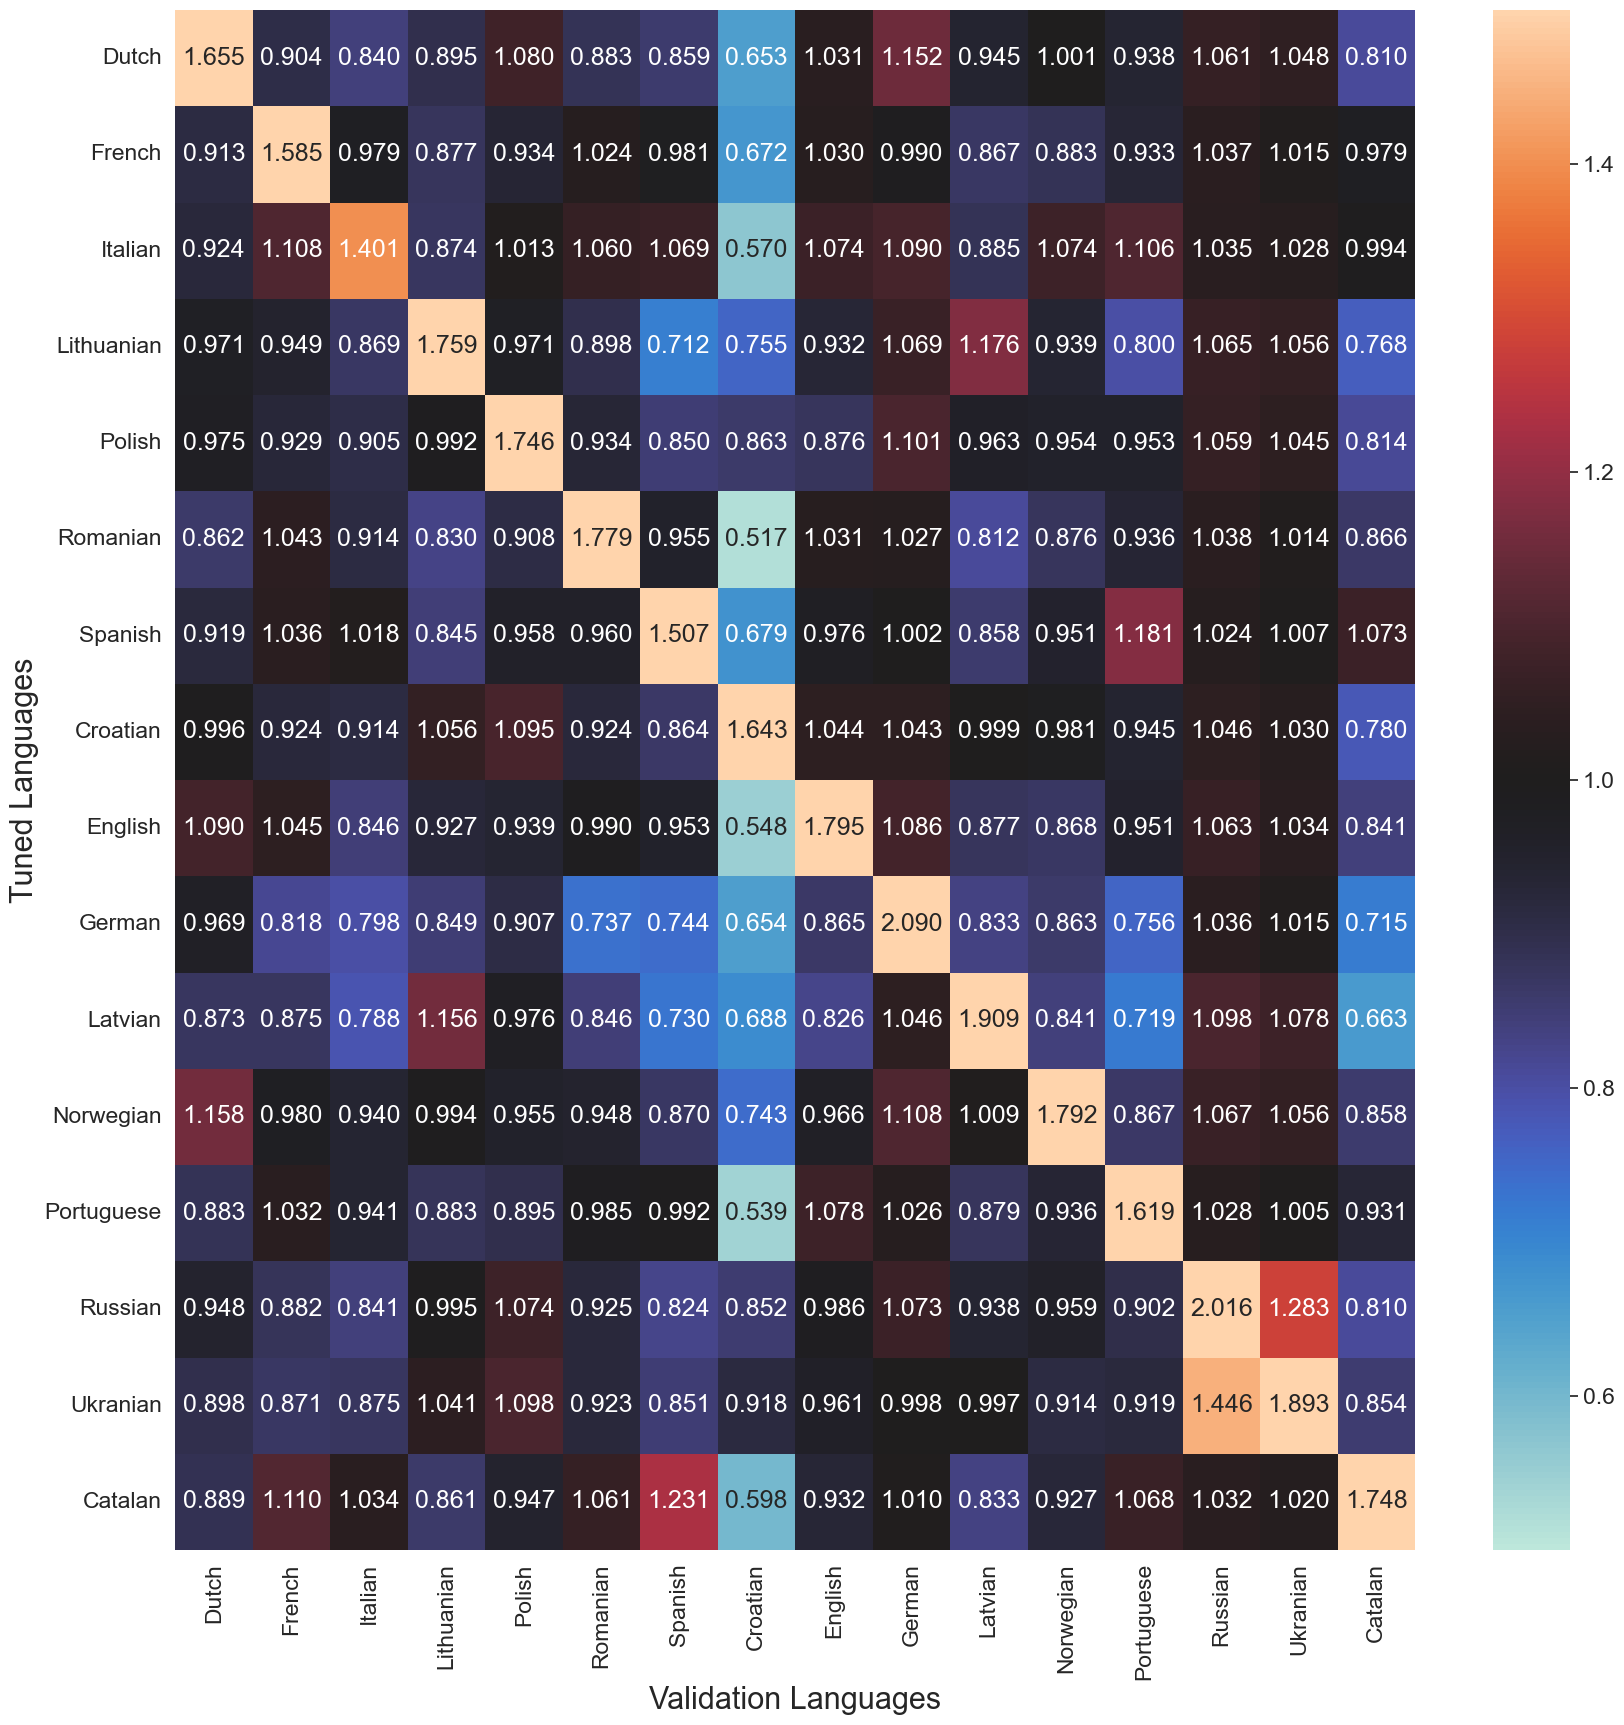

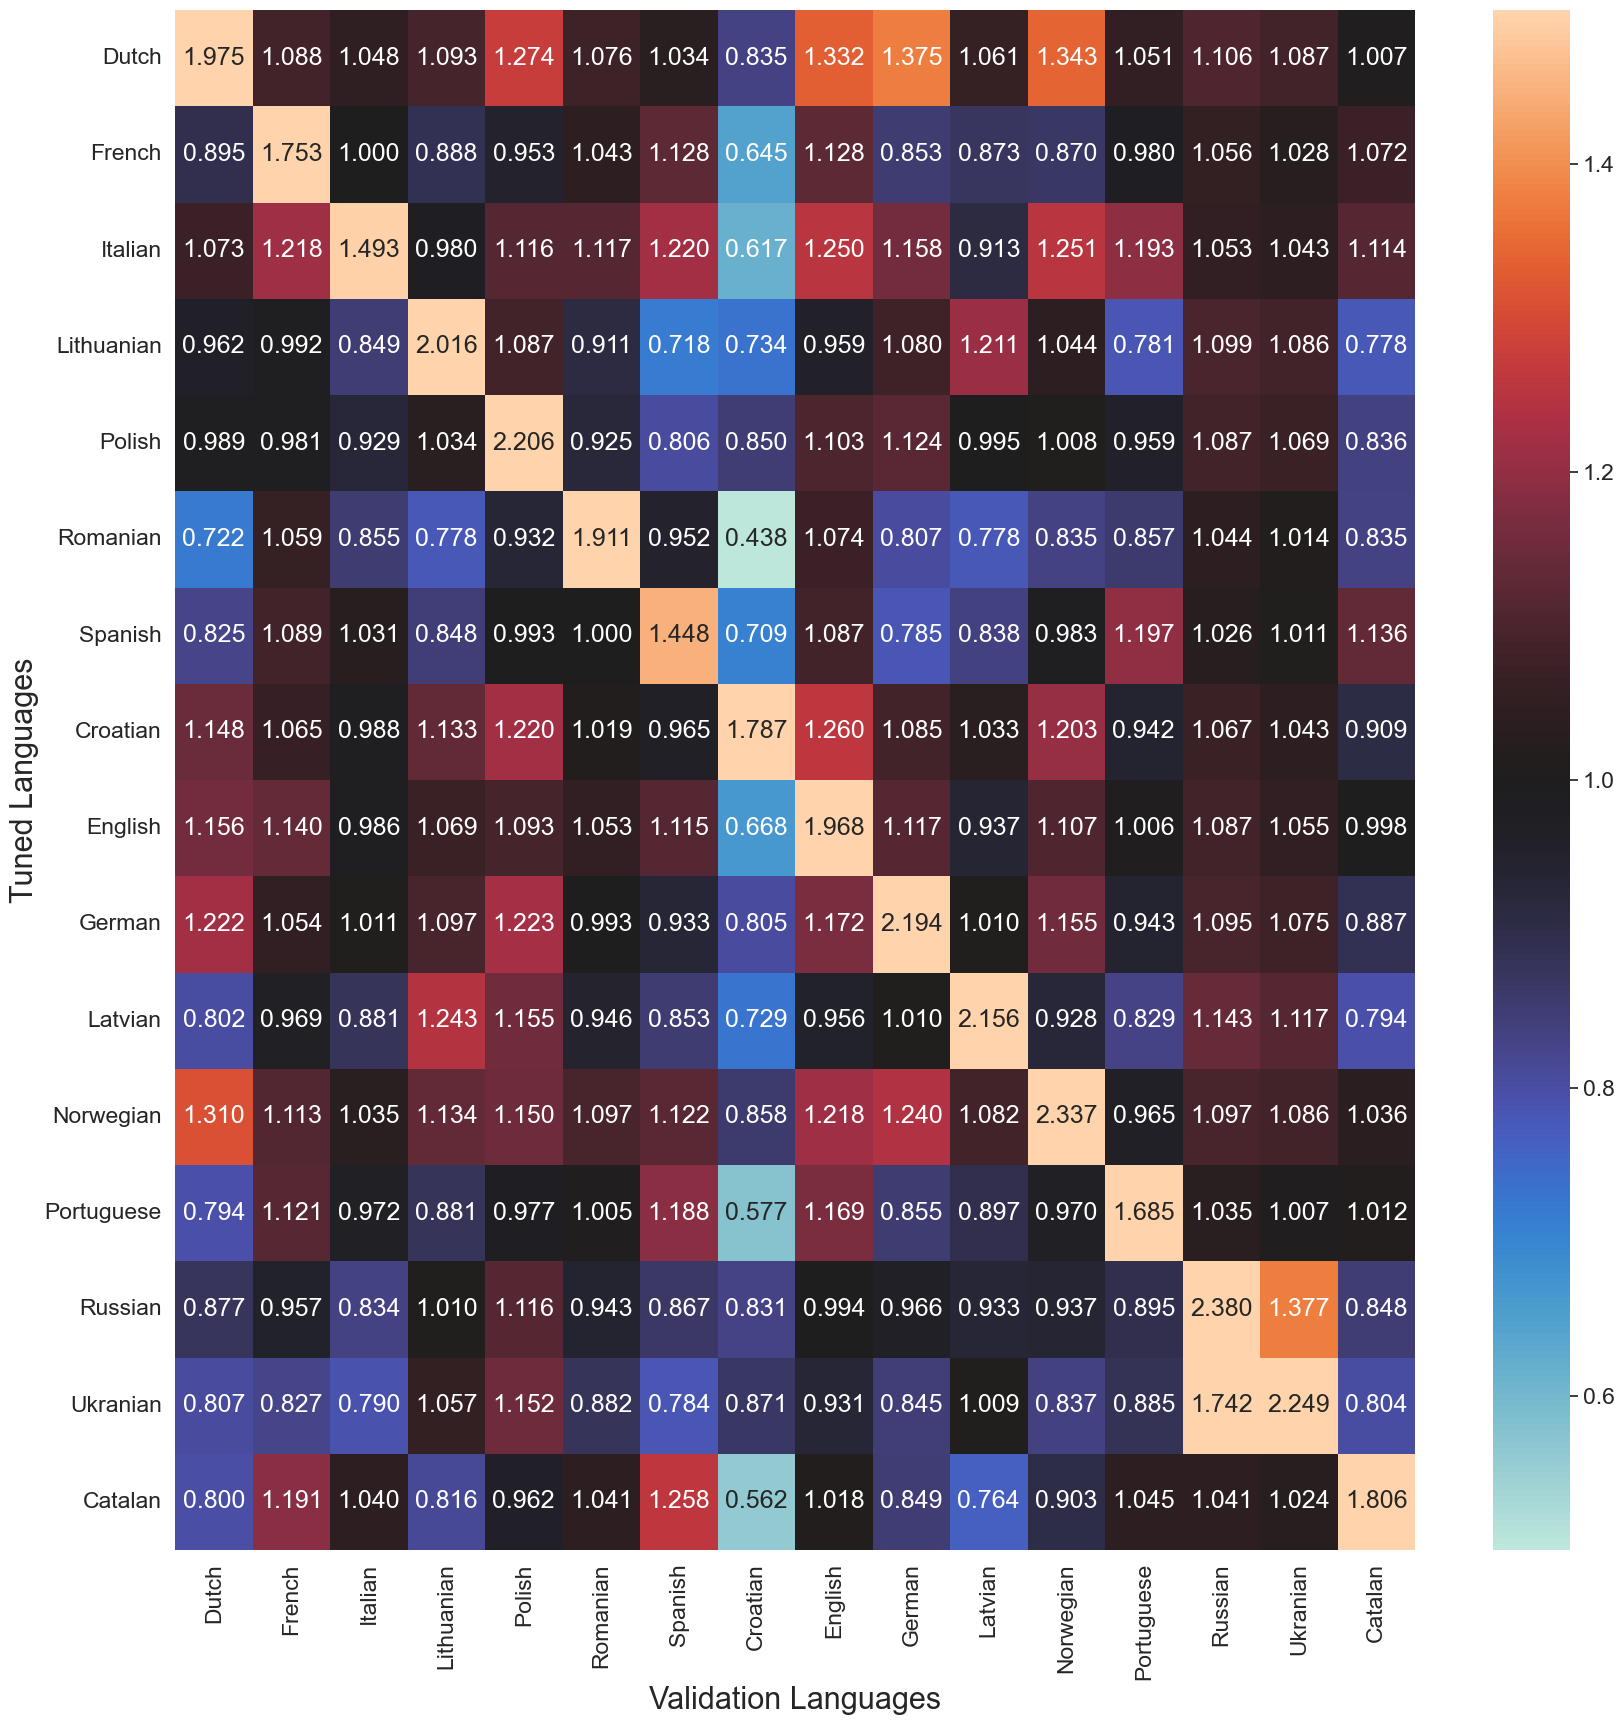

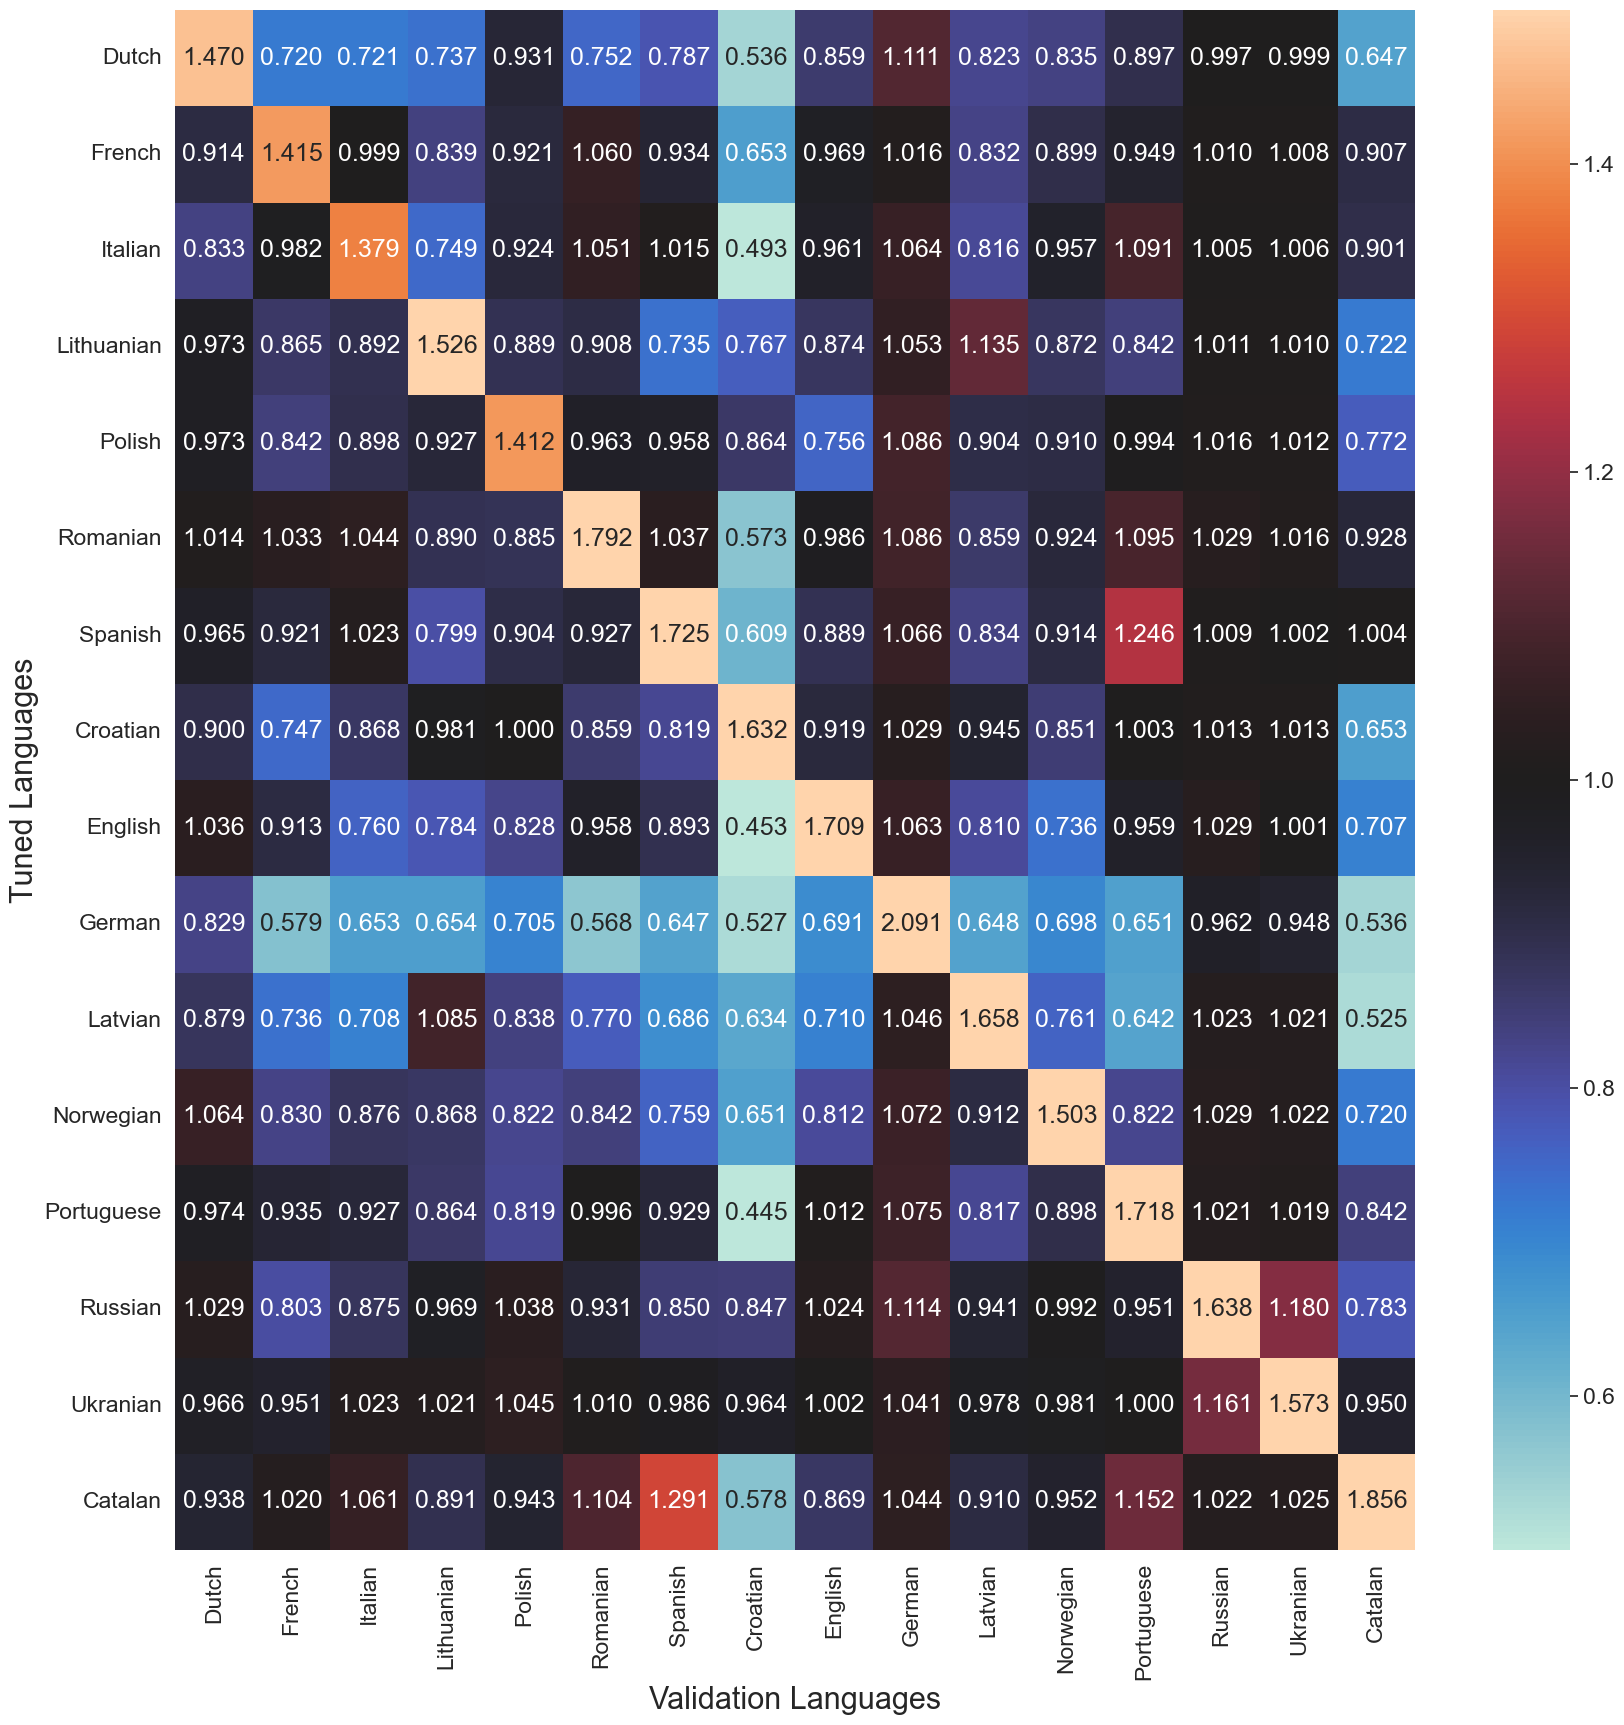

In [7]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df_both,
            annot=True,
            fmt='.3f',
            vmin=0.5,
            vmax=1.5, 
            center=1)

plt.xlabel('Validation Languages',fontsize=22)
plt.ylabel('Tuned Languages',fontsize=22)

plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df_pun,
            annot=True,
            fmt='.3f',
            vmin=0.5,
            vmax=1.5, 
            center=1)

plt.xlabel('Validation Languages',fontsize=22)
plt.ylabel('Tuned Languages',fontsize=22)

plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df_cap,
            annot=True,
            fmt='.3f',
            vmin=0.5,
            vmax=1.5, 
            center=1)

plt.xlabel('Validation Languages',fontsize=22)
plt.ylabel('Tuned Languages',fontsize=22)

In [8]:
for i, tal in enumerate(tables):
    print(lans[i])
    print(Extract_names(sorted(tal, key=itemgetter(1)))[-4:-1][::-1])

Dutch
['German', 'Polish', 'Russian']
French
['Russian', 'English', 'Romanian']
Italian
['French', 'Portuguese', 'German']
Lithuanian
['Latvian', 'German', 'Russian']
Polish
['German', 'Russian', 'Ukranian']
Romanian
['French', 'Russian', 'English']
Spanish
['Portuguese', 'Catalan', 'French']
Croatian
['Polish', 'Lithuanian', 'Russian']
English
['Dutch', 'German', 'Russian']
German
['Russian', 'Ukranian', 'Dutch']
Latvian
['Lithuanian', 'Russian', 'Ukranian']
Norwegian
['Dutch', 'German', 'Russian']
Portuguese
['English', 'French', 'Russian']
Russian
['Ukranian', 'Polish', 'German']
Ukranian
['Russian', 'Polish', 'Lithuanian']
Catalan
['Spanish', 'French', 'Portuguese']


In [9]:
for i, tal in enumerate(tables):
    print(lans[i])
    print(Extract_names(sorted(tal, key=itemgetter(2)))[-4:-1][::-1])

Dutch
['German', 'Norwegian', 'English']
French
['Spanish', 'English', 'Catalan']
Italian
['Norwegian', 'English', 'Spanish']
Lithuanian
['Latvian', 'Russian', 'Polish']
Polish
['German', 'English', 'Russian']
Romanian
['English', 'French', 'Russian']
Spanish
['Portuguese', 'Catalan', 'French']
Croatian
['English', 'Polish', 'Norwegian']
English
['Dutch', 'French', 'German']
German
['Polish', 'Dutch', 'English']
Latvian
['Lithuanian', 'Polish', 'Russian']
Norwegian
['Dutch', 'German', 'English']
Portuguese
['Spanish', 'English', 'French']
Russian
['Ukranian', 'Polish', 'Lithuanian']
Ukranian
['Russian', 'Polish', 'Lithuanian']
Catalan
['Spanish', 'French', 'Portuguese']


In [10]:
for i, tal in enumerate(tables):
    print(lans[i])
    print(Extract_names(sorted(tal, key=itemgetter(3)))[-4:-1][::-1])

Dutch
['German', 'Ukranian', 'Russian']
French
['Romanian', 'German', 'Russian']
Italian
['Portuguese', 'German', 'Romanian']
Lithuanian
['Latvian', 'German', 'Russian']
Polish
['German', 'Russian', 'Ukranian']
Romanian
['Portuguese', 'German', 'Italian']
Spanish
['Portuguese', 'German', 'Italian']
Croatian
['German', 'Ukranian', 'Russian']
English
['German', 'Dutch', 'Russian']
German
['Russian', 'Ukranian', 'Dutch']
Latvian
['Lithuanian', 'German', 'Russian']
Norwegian
['German', 'Dutch', 'Russian']
Portuguese
['German', 'Russian', 'Ukranian']
Russian
['Ukranian', 'German', 'Polish']
Ukranian
['Russian', 'Polish', 'German']
Catalan
['Spanish', 'Portuguese', 'Romanian']
